# **Prueba ML: Romero Olmos Luis Eduardo**

***Notas Aclaratorias***

***Encapsulamiento del preprocesamiento:***
El preprocesamiento fue encapsulado en dos funciones principales: una para la creación de variables y otra para la codificación de las mismas. Esta separación permite un mayor control y escalabilidad, especialmente considerando que la estrategia de modelado contemplaba el uso de modelos en ensamble. El único procesamiento realizado fue la codificación de variables mediante frequency encoding; la normalización no fue necesaria debido a la naturaleza de los modelos utilizados (árboles). Fuera de esto, no se aplicaron pasos adicionales.

***Inclusión de columnas de tiempo:***
Algunas variables relacionadas con el tiempo, aunque no altamente predictoras de forma directa, se mantuvieron en el conjunto de datos. Esto se hizo intencionalmente para permitir que los modelos de ensamble basados en árboles pudieran capturar relaciones no lineales con respecto al tiempo, lo cual demostró ser beneficioso para el rendimiento del modelo.

***Estructura modular del pipeline:***
Los pasos del 1 al 4 fueron diseñados de forma independiente, y cada función es autónoma. Esto permite su implementación en un entorno de producción, facilitando tareas como la detección de data drift y el monitoreo continuo. A partir del paso 5 hasta el paso 9, los módulos presentan cierta dependencia entre ellos; sin embargo, se construyeron de manera modular, lo que permite, por ejemplo, cambiar fácilmente el modelo o incorporar técnicas avanzadas de feature engineering sin reestructurar todo el flujo.

## **PASO 1: DESCRIPCIÓN DETALLADA DEL PROBLEMA DE NEGOCIO**

En este primer paso definiremos claramente el problema que queremos resolver,
la metodología a utilizar y las tareas específicas a realizar.

### **CONTEXTO:**
Trabajamos para una agencia de viajes online que desea ofrecer a sus clientes
una herramienta de estimación precisa de precios de boletos de avión.

### **PROBLEMA:**
Los precios de vuelos varían significativamente según múltiples factores:
- Aerolínea
- Destino y origen
- Temporada/fecha
- Clase de servicio (Business vs Economy)  
- Anticipación de la reserva
- Duración del vuelo
- Tipo de escalas

### **NECESIDAD:**
Desarrollar un modelo predictivo que permita estimar con precisión el precio
de un boleto de avión basándose en las características del vuelo.

### **IMPACTO ESPERADO:**
- Mejorar la experiencia del usuario con estimaciones precisas
- Optimizar estrategias de pricing de la agencia
- Aumentar conversiones al ofrecer precios competitivos
- Facilitar la toma de decisiones de los viajeros



### **Aplicaremos la metodología CRISP-DM (Cross Industry Standard Process for Data Mining):**

1️⃣  COMPRENSIÓN DEL NEGOCIO (Business Understanding)

-  ✅ Definir objetivos del proyecto
-  ✅ Identificar criterios de éxito
-  ✅ Evaluar recursos y restricciones

2️⃣  COMPRENSIÓN DE LOS DATOS (Data Understanding)
-  🔄 Recolección y exploración de datos
-  🔄 Análisis de calidad de datos
-  🔄 Identificación de patrones iniciales

3️⃣  PREPARACIÓN DE DATOS (Data Preparation)
-  🔄 Limpieza de datos
-  🔄 Transformación de variables
-  🔄 Ingeniería de características

4️⃣  MODELADO (Modeling)
-  🔄 Selección de técnicas de modelado
-  🔄 Entrenamiento de modelos
-  🔄 Optimización de hiperparámetros

5️⃣  EVALUACIÓN (Evaluation)
-  🔄 Evaluación de modelos
-  🔄 Comparación de performance
-  🔄 Validación de resultados

6️⃣  IMPLEMENTACIÓN (Deployment)
-  🔄 Plan de implementación
-  🔄 Recomendaciones finales

#### **CRONOGRAMA DE ACTIVIDADES:**

**FASE 1: ANÁLISIS Y PREPARACIÓN DE DATOS**

   ✅ Paso 1: Definición del problema (COMPLETADO)

   🔄 Paso 2: Carga y reporte de calidad de datos

   🔄 Paso 3: Análisis exploratorio (univariado y bivariado)

   🔄 Paso 4: Análisis de correlaciones

   🔄 Paso 5: Transformación y creación de variables

   🔄 Paso 6: Función de limpieza de datos


**FASE 2: MODELADO Y EVALUACIÓN**

   🔄 Paso 7: Selección y entrenamiento de modelos (mín. 3)

   🔄 Paso 8: Optimización de hiperparámetros

   🔄 Paso 9: Evaluación con múltiples métricas (mín. 3)

   🔄 Paso 10: Conclusiones y próximos pasos

**CRITERIOS DE ÉXITO:**

✓ R² > 0.80 (explicar 80%+ de la varianza)

✓ RMSE < 15% del precio promedio

✓ Modelo interpretable y robusto

✓ Validación cruzada consistente

**OBJETIVO: **

Desarrollar modelo ML para predecir precios de vuelos

**DATOS:** 300K registros de vuelos (Business + Economy)

**METODOLOGÍA:** CRISP-DM con enfoque en regresión


**ENTREGABLES:**

   - Análisis exploratorio completo
   - Función de preprocesamiento de datos
   - Múltiples modelos comparados y optimizados
   - Evaluación con métricas robustas
   - Recomendaciones para implementación

**IMPACTO ESPERADO:**

   - Estimaciones precisas de precios para usuarios
   - Mejora en experiencia del cliente
   - Optimización de estrategias comerciales


## **PASO 2: CARGA DE DATASETS Y ANÁLISIS DE CALIDAD**

En este paso cargaremos los datos, exploraremos su estructura y generaremos
un reporte completo de la calidad de los datos identificando problemas
y estrategias de solución.

In [ ]:
# =============================================================================
# 2. CARGA DE DATASETS Y ANÁLISIS DE CALIDAD
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# =============================================================================
# 2.1 CARGA DE DATASETS
# =============================================================================
print("\n 2.1 CARGA DE DATASETS")
print("-" * 50)

try:
    print("Cargando dataset de vuelos Business...")
    business_df = pd.read_excel('business.xlsx')
    print(f"Business dataset cargado: {business_df.shape[0]:,} filas, {business_df.shape[1]} columnas")

    print("Cargando dataset de vuelos Economy...")
    economy_df = pd.read_excel('economy.xlsx')
    print(f" Economy dataset cargado: {economy_df.shape[0]:,} filas, {economy_df.shape[1]} columnas")

    # Agregar columna identificadora de clase
    business_df['class'] = 'Business'
    economy_df['class'] = 'Economy'

    print(f"\n RESUMEN DE CARGA:")
    print(f"   • Total registros Business: {business_df.shape[0]:,}")
    print(f"   • Total registros Economy: {economy_df.shape[0]:,}")
    print(f"   • Total combinado: {business_df.shape[0] + economy_df.shape[0]:,}")

except FileNotFoundError as e:
    print("Error: Archivos no encontrados.")


 2.1 CARGA DE DATASETS
--------------------------------------------------
Cargando dataset de vuelos Business...
Business dataset cargado: 93,487 filas, 11 columnas
Cargando dataset de vuelos Economy...
 Economy dataset cargado: 206,774 filas, 11 columnas

 RESUMEN DE CARGA:
   • Total registros Business: 93,487
   • Total registros Economy: 206,774
   • Total combinado: 300,261


In [ ]:
# =============================================================================
# 2.2 EXPLORACIÓN INICIAL DE ESTRUCTURA
# =============================================================================

print("\n 2.2 EXPLORACIÓN INICIAL DE ESTRUCTURA")
print("-" * 50)

def explorar_estructura(df, nombre_dataset):
    """Función para explorar la estructura básica de un dataset"""
    print(f"\n ANÁLISIS DE {nombre_dataset.upper()}:")
    print(f"   • Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print(f"\n  TIPOS DE DATOS:")
    for col, dtype in df.dtypes.items():
        print(f"      {col:<12} : {dtype}")

    print(f"\n PRIMERAS 3 FILAS:")
    display(df.head(3))

    return df.shape, df.dtypes

# Explorar ambos datasets
if 'business_df' in locals() and 'economy_df' in locals():
    business_info = explorar_estructura(business_df, "Business")
    economy_info = explorar_estructura(economy_df, "Economy")


 2.2 EXPLORACIÓN INICIAL DE ESTRUCTURA
--------------------------------------------------

 ANÁLISIS DE BUSINESS:
   • Dimensiones: 93,487 filas × 12 columnas
   • Memoria utilizada: 49.90 MB

  TIPOS DE DATOS:
      date         : datetime64[ns]
      airline      : object
      ch_code      : object
      num_code     : int64
      dep_time     : object
      from         : object
      time_taken   : object
      stop         : object
      arr_time     : object
      to           : object
      price        : object
      class        : object

 PRIMERAS 3 FILAS:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,Business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,Business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,Business



 ANÁLISIS DE ECONOMY:
   • Dimensiones: 206,774 filas × 12 columnas
   • Memoria utilizada: 104.10 MB

  TIPOS DE DATOS:
      date         : datetime64[ns]
      airline      : object
      ch_code      : object
      num_code     : int64
      dep_time     : object
      from         : object
      time_taken   : object
      stop         : object
      arr_time     : object
      to           : object
      price        : int64
      class        : object

 PRIMERAS 3 FILAS:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,Economy
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,Economy
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,Economy


In [ ]:
# =============================================================================
# 2.3 REPORTE DE CALIDAD DE DATOS
# =============================================================================

print("\n 2.3 REPORTE COMPLETO DE CALIDAD DE DATOS")
print("-" * 50)

def generar_reporte_calidad(df, nombre_dataset):
    """Genera un reporte completo de calidad de datos"""

    print(f"\n REPORTE DE CALIDAD - {nombre_dataset.upper()}")
    print("=" * 60)

    # 2.3.1 VALORES NULOS
    print("\n 2.3.1 ANÁLISIS DE VALORES NULOS:")
    valores_nulos = df.isnull().sum()
    porcentaje_nulos = (valores_nulos / len(df)) * 100

    reporte_nulos = pd.DataFrame({
        'Columna': valores_nulos.index,
        'Valores_Nulos': valores_nulos.values,
        'Porcentaje_Nulos': porcentaje_nulos.values
    }).sort_values('Valores_Nulos', ascending=False)

    print(reporte_nulos.to_string(index=False))

    if reporte_nulos['Valores_Nulos'].sum() == 0:
        print(" No se encontraron valores nulos")
    else:
        print(f"Total valores nulos: {reporte_nulos['Valores_Nulos'].sum():,}")

    # 2.3.2 VALORES DUPLICADOS
    print(f"\n 2.3.2 ANÁLISIS DE DUPLICADOS:")
    duplicados = df.duplicated().sum()
    porcentaje_duplicados = (duplicados / len(df)) * 100
    print(f"   • Filas duplicadas: {duplicados:,} ({porcentaje_duplicados:.2f}%)")

    # 2.3.3 ANÁLISIS POR TIPO DE VARIABLE
    print(f"\n 2.3.3 ANÁLISIS POR TIPO DE VARIABLE:")

    # Variables numéricas
    numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    if numericas:
        print(f"   VARIABLES NUMÉRICAS ({len(numericas)}):")
        for col in numericas:
            if col in df.columns:
                print(f" {col}:")
                print(f" - Min: {df[col].min()}")
                print(f" - Max: {df[col].max()}")
                print(f" - Media: {df[col].mean():.2f}")
                print(f" - Valores únicos: {df[col].nunique():,}")

    # Variables categóricas/texto
    categoricas = df.select_dtypes(include=['object']).columns.tolist()
    if categoricas:
        print(f"\n   VARIABLES CATEGÓRICAS ({len(categoricas)}):")
        for col in categoricas:
            if col in df.columns:
                valores_unicos = df[col].nunique()
                print(f"      {col}:")
                print(f"         - Valores únicos: {valores_unicos:,}")
                if valores_unicos <= 20:  # Mostrar valores si son pocos
                    print(f"         - Valores: {list(df[col].unique())}")
                else:
                    print(f"         - Top 5: {list(df[col].value_counts().head().index)}")

    # Variables temporales
    temporales = df.select_dtypes(include=['datetime64']).columns.tolist()
    if temporales:
        print(f"\n    VARIABLES TEMPORALES ({len(temporales)}):")
        for col in temporales:
            print(f"      {col}:")
            print(f"         - Rango: {df[col].min()} a {df[col].max()}")
            print(f"         - Valores únicos: {df[col].nunique():,}")

    return reporte_nulos, duplicados

# Generar reportes de calidad
if 'business_df' in locals() and 'economy_df' in locals():
    business_calidad = generar_reporte_calidad(business_df, "Business")
    economy_calidad = generar_reporte_calidad(economy_df, "Economy")


 2.3 REPORTE COMPLETO DE CALIDAD DE DATOS
--------------------------------------------------

 REPORTE DE CALIDAD - BUSINESS

 2.3.1 ANÁLISIS DE VALORES NULOS:
   Columna  Valores_Nulos  Porcentaje_Nulos
      date              0               0.0
   airline              0               0.0
   ch_code              0               0.0
  num_code              0               0.0
  dep_time              0               0.0
      from              0               0.0
time_taken              0               0.0
      stop              0               0.0
  arr_time              0               0.0
        to              0               0.0
     price              0               0.0
     class              0               0.0
 No se encontraron valores nulos

 2.3.2 ANÁLISIS DE DUPLICADOS:
   • Filas duplicadas: 0 (0.00%)

 2.3.3 ANÁLISIS POR TIPO DE VARIABLE:
   VARIABLES NUMÉRICAS (1):
 num_code:
 - Min: 401
 - Max: 996
 - Media: 780.06
 - Valores únicos: 264

   VARIABLES CATEGÓRICAS (

In [ ]:
# =============================================================================
# 2.4 DETECCIÓN DE OUTLIERS Y ANOMALÍAS
# =============================================================================

print("\n 2.4 DETECCIÓN DE OUTLIERS Y ANOMALÍAS")
print("-" * 50)

# PASO 1: TRANSFORMAR DATOS A TIPOS CORRECTOS
print("\n PASO 1: TRANSFORMACIÓN DE TIPOS DE DATOS")
print("-" * 40)

def transformar_tipos_datos(df, nombre_dataset):
    """Transforma los tipos de datos a los correctos"""
    print(f" Transformando {nombre_dataset}...")
    df_limpio = df.copy()

    # Transformar price a numérico
    print(f"   - Tipo original de 'price': {df_limpio['price'].dtype}")
    df_limpio['price'] = pd.to_numeric(df_limpio['price'], errors='coerce')
    nulos_conversion = df_limpio['price'].isnull().sum()
    print(f"   - Tipo nuevo de 'price': {df_limpio['price'].dtype}")
    print(f"   - Valores convertidos: {len(df_limpio) - nulos_conversion:,} / {len(df_limpio):,}")

    if nulos_conversion > 0:
        print(f"   -  {nulos_conversion} valores no pudieron convertirse (se mantienen como NaN)")
    else:
        print(f"   -  Todos los valores convertidos exitosamente")

    return df_limpio

# Transformar ambos datasets
if 'business_df' in locals() and 'economy_df' in locals():
    print("Transformando datasets...")
    business_clean = transformar_tipos_datos(business_df, "BUSINESS")
    economy_clean = transformar_tipos_datos(economy_df, "ECONOMY")
    print("Transformación completada\n")
else:
    print("Datasets no encontrados")

# PASO 2: ANÁLISIS DE OUTLIERS (SIMPLE Y LIMPIO)
print("\n PASO 2: ANÁLISIS DE OUTLIERS")
print("-" * 40)

def detectar_outliers(df, columna, nombre_dataset):
    """Detecta outliers usando método IQR - Versión Simple"""
    print(f"\n Analizando outliers en {nombre_dataset}:")

    # Estadísticas básicas
    serie = df[columna].dropna()
    print(f"   • Valores válidos: {len(serie):,}")
    print(f"   • Min: ${serie.min():,.0f}")
    print(f"   • Max: ${serie.max():,.0f}")
    print(f"   • Media: ${serie.mean():,.0f}")
    print(f"   • Mediana: ${serie.median():,.0f}")

    # Cálculo IQR
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[columna] < limite_inf) | (df[columna] > limite_sup)]
    porcentaje = (len(outliers) / len(serie)) * 100

    print(f"   • Q1: ${Q1:,.0f} | Q3: ${Q3:,.0f} | IQR: ${IQR:,.0f}")
    print(f"   • Límites: ${limite_inf:,.0f} - ${limite_sup:,.0f}")
    print(f"   • Outliers: {len(outliers):,} ({porcentaje:.1f}%)")

    # Ejemplos de outliers más extremos
    if len(outliers) > 0:
        print(f" Top 5 outliers más extremos:")
        top_outliers = outliers.nlargest(5, columna)
        for i, (idx, row) in enumerate(top_outliers.iterrows(), 1):
            print(f"      {i}. ${row[columna]:,.0f} - {row['airline']} ({row['from']}→{row['to']})")

    return outliers, limite_inf, limite_sup

# Analizar outliers en ambos datasets limpios
if 'business_clean' in locals() and 'economy_clean' in locals():
    business_outliers = detectar_outliers(business_clean, 'price', 'BUSINESS')
    economy_outliers = detectar_outliers(economy_clean, 'price', 'ECONOMY')
else:
    print("Datasets limpios no disponibles")



 2.4 DETECCIÓN DE OUTLIERS Y ANOMALÍAS
--------------------------------------------------

 PASO 1: TRANSFORMACIÓN DE TIPOS DE DATOS
----------------------------------------
Transformando datasets...
 Transformando BUSINESS...
   - Tipo original de 'price': object
   - Tipo nuevo de 'price': float64
   - Valores convertidos: 93,379 / 93,487
   -  108 valores no pudieron convertirse (se mantienen como NaN)
 Transformando ECONOMY...
   - Tipo original de 'price': int64
   - Tipo nuevo de 'price': int64
   - Valores convertidos: 206,774 / 206,774
   -  Todos los valores convertidos exitosamente
Transformación completada


 PASO 2: ANÁLISIS DE OUTLIERS
----------------------------------------

 Analizando outliers en BUSINESS:
   • Valores válidos: 93,379
   • Min: $12,000
   • Max: $99,680
   • Media: $52,479
   • Mediana: $53,164
   • Q1: $45,185 | Q3: $60,396 | IQR: $15,211
   • Límites: $22,368 - $83,212
   • Outliers: 3,542 (3.8%)
 Top 5 outliers más extremos:
      1. $99,680 - Vist

**2.5 PROBLEMAS IDENTIFICADOS Y ESTRATEGIAS DE SOLUCIÓN"**



**PROBLEMAS IDENTIFICADOS CON BASE EN EL ANÁLISIS REAL:**

1️⃣  **INCONSISTENCIAS EN TIPOS DE DATOS**:

-  PROBLEMA: Variable 'price' en Business es 'object', en Economy es 'int64'
- IMPACTO: 108 valores corruptos en Business (0.12% del dataset)
- EJEMPLO: Algunos precios almacenados como texto

   **ESTRATEGIAS APLICADAS:**
- Conversión unificada a float64 con pd.to_numeric()
- Valores problemáticos convertidos a NaN para tratamiento posterior
- Documentación de pérdida de datos (108 registros = 0.12%)

2️⃣ **PROBLEMAS EN VARIABLE 'STOP' (PARADAS):**
-  PROBLEMA: Datos sucios con caracteres de control y espacios
   EJEMPLO: '1-stop\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t\\t\\t\\t\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t\\t\\t\\t'
-  IMPACTO: 25 categorías en Business, 37 en Economy (muchas redundantes)

   **ESTRATEGIAS PROPUESTAS:**
- Limpieza de caracteres de control (\\n, \\t)
- Estandarización a categorías: 'non-stop', '1-stop', '2-stop', '2+-stop'
- Tratamiento de información 'Via [aeropuerto]' como metadata adicional
- Utilizar modelos Ensemble para mitigar el impacto

3️⃣ ** VARIABLES TEMPORALES MAL FORMATEADAS:**
- PROBLEMA: 'dep_time' y 'arr_time' como object (no datetime)
- PROBLEMA: 'time_taken' en formato texto ('02h 10m')
- IMPACTO: No se pueden hacer cálculos temporales directos

   **ESTRATEGIAS PROPUESTAS:**
- Parsear 'time_taken' a minutos numéricos
- Convertir horarios a datetime.time
- Crear variables derivadas: hora_salida, hora_llegada, duracion_minutos

4️⃣  **OUTLIERS SIGNIFICATIVOS EN PRECIOS:**
- PROBLEMA: 3,542 outliers en Business (3.8%), 13,750 en Economy (6.6%)
- RANGOS EXTREMOS:

        • Business: $12K - $100K (rango 8x)

        • Economy: $1K - $42K (rango 38x)

- CAUSA: Diferencias estacionales, rutas premium, tarifas de última hora

   **ESTRATEGIAS PROPUESTAS:**
- MANTENER outliers (son válidos comercialmente)
- Transformación logarítmica para reducir asimetría
- Análisis por segmentos (ruta, aerolínea, temporada)
- Feature engineering: ratio precio/duración

5️⃣  **DESEQUILIBRIO DE DATOS ENTRE CLASES:**
- PROBLEMA: Economy (206K) vs Business (93K) - ratio 2.2:1
- PROBLEMA: Business solo 2 aerolíneas vs Economy 8 aerolíneas
- IMPACTO: Sesgo hacia patrones de Economy en modelos

   **ESTRATEGIAS PROPUESTAS:**
- Estratificación por clase en train/test split
- Análisis separado por clase si es necesario
- Balanceo con técnicas de resampling si requerido

6️⃣  **DUPLICADOS MÍNIMOS:**
- PROBLEMA: 2 duplicados en Economy (0.001%)
- IMPACTO: Negligible

   **ESTRATEGIAS:**
- Eliminar duplicados encontrados
- Verificar duplicados después de limpieza de datos

2.6 PLAN DETALLADO DE LIMPIEZA Y PREPROCESAMIENTO")


📋 SECUENCIA DETALLADA DE PREPROCESAMIENTO (BASADA EN ANÁLISIS REAL):

🔄 PASO A: INTEGRACIÓN Y LIMPIEZA INICIAL
   1. ✅ COMPLETADO: Combinar Business + Economy datasets (300,261 registros)
   2. ✅ COMPLETADO: Agregar columna 'class' identificadora
   3. ✅ COMPLETADO: Convertir 'price' a float64 unificado
   4. 🔄 PENDIENTE: Eliminar 2 registros duplicados de Economy
   5. 🔄 PENDIENTE: Decidir tratamiento de 108 precios nulos en Business

🔄 PASO B: LIMPIEZA DE VARIABLES CATEGÓRICAS
   1. 🔄 Limpiar variable 'stop':
      - Eliminar caracteres de control (\\n, \\t)  
      - Extraer información de aeropuerto intermedio (Via XXX)
      - Estandarizar a: 'non-stop', '1-stop', '2-stop', '2+-stop'
   
   2. 🔄 Verificar consistencia en:
      - Nombres de aerolíneas (8 vs 2 entre clases)
      - Códigos de aerolínea (redundancia con nombres)
      - Nombres de ciudades (6 ciudades únicas confirmadas)

🔄 PASO C: TRANSFORMACIÓN DE VARIABLES TEMPORALES
   1. 🔄 Procesar 'time_taken':
      - Parsear formato 'XXh XXm' a minutos totales
      - Ejemplo: '02h 10m' → 130 minutos
   
   2. 🔄 Procesar horarios:
      - Mantener 'dep_time' y 'arr_time' como time objects
      - Extraer: hora_salida (0-23), hora_llegada (0-23)
   
   3. 🔄 Variables derivadas de fecha:
      - Extraer: mes, día_semana, semana_año
      - Crear indicadores: fin_semana, temporada_alta

🔄 PASO D: INGENIERÍA DE CARACTERÍSTICAS
   1. 🔄 Variables derivadas de precios:
      - precio_por_minuto = price / duracion_minutos  
      - precio_log = log(price) [para reducir asimetría]
      - precio_estandarizado_por_clase
   
   2. 🔄 Variables de rutas:
      - distancia_estimada (basada en from-to)
      - popularidad_ruta = count(from-to combinations)
      - es_ruta_premium = indicador para rutas caras
   
   3. 🔄 Variables de aerolíneas:
      - es_low_cost = indicador (SpiceJet, AirAsia, GO FIRST, Indigo)
      - es_premium = indicador (Air India, Vistara)

🔄 PASO E: TRATAMIENTO DE OUTLIERS
   1. 🔄 Análisis detallado de outliers:
      - Business: 3,542 outliers (3.8%) - MANTENER (válidos comercialmente)
      - Economy: 13,750 outliers (6.6%) - MANTENER (válidos comercialmente)
   
   2. 🔄 Transformaciones para outliers:
      - Transformación logarítmica de precios
      - Winsorización al percentil 99 solo si mejora modelos
      - Crear indicador 'es_outlier' como feature

🔄 PASO F: ENCODING Y PREPARACIÓN FINAL
   1. 🔄 Encoding de variables categóricas:
      - airline: Frecuency Encoding (10 categorías)
      - from/to: Frecuency Encoding (6 ciudades c/u)
      - stop: Frecuency (non-stop=0, 1-stop=1, etc.)
   
   2. 🔄 División train/test:
      - Estratificación por 'class' (Business/Economy)
      - Split 80/20 con random_state fijo
      - Validación temporal si es relevante

🔄 PASO G: VALIDACIÓN DE CALIDAD FINAL
   1. 🔄 Verificaciones finales:
      - Cero valores nulos en features finales
      - Consistencia de tipos de datos
      - Rango válido en todas las variables
      - Correlación features vs target

**MÉTRICAS DE CALIDAD ESPERADAS POST-LIMPIEZA:**
   - Registros finales: ~300,150 (pérdida < 0.1%)
   - Features finales: ~25-30 variables
   - Valores nulos: 0%
   - Duplicados: 0%
   - Outliers: Mantenidos con transformación logarítmica


## **PASO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [ ]:
# =============================================================================
# PROYECTO: PREDICCIÓN DEL PRECIO DE VUELOS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [ ]:
print("="*80)
print("PASO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*80)
# Combinar datasets
df_combined = pd.concat([business_df, economy_df], ignore_index=True)
print(f"Dataset combinado: {df_combined.shape[0]:,} filas × {df_combined.shape[1]} columnas")

PASO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)
Dataset combinado: 300,261 filas × 12 columnas



 3.1 ANÁLISIS UNIVARIADO
--------------------------------------------------

 3.1.1 ANÁLISIS DE LA VARIABLE OBJETIVO: PRECIO
----------------------------------------


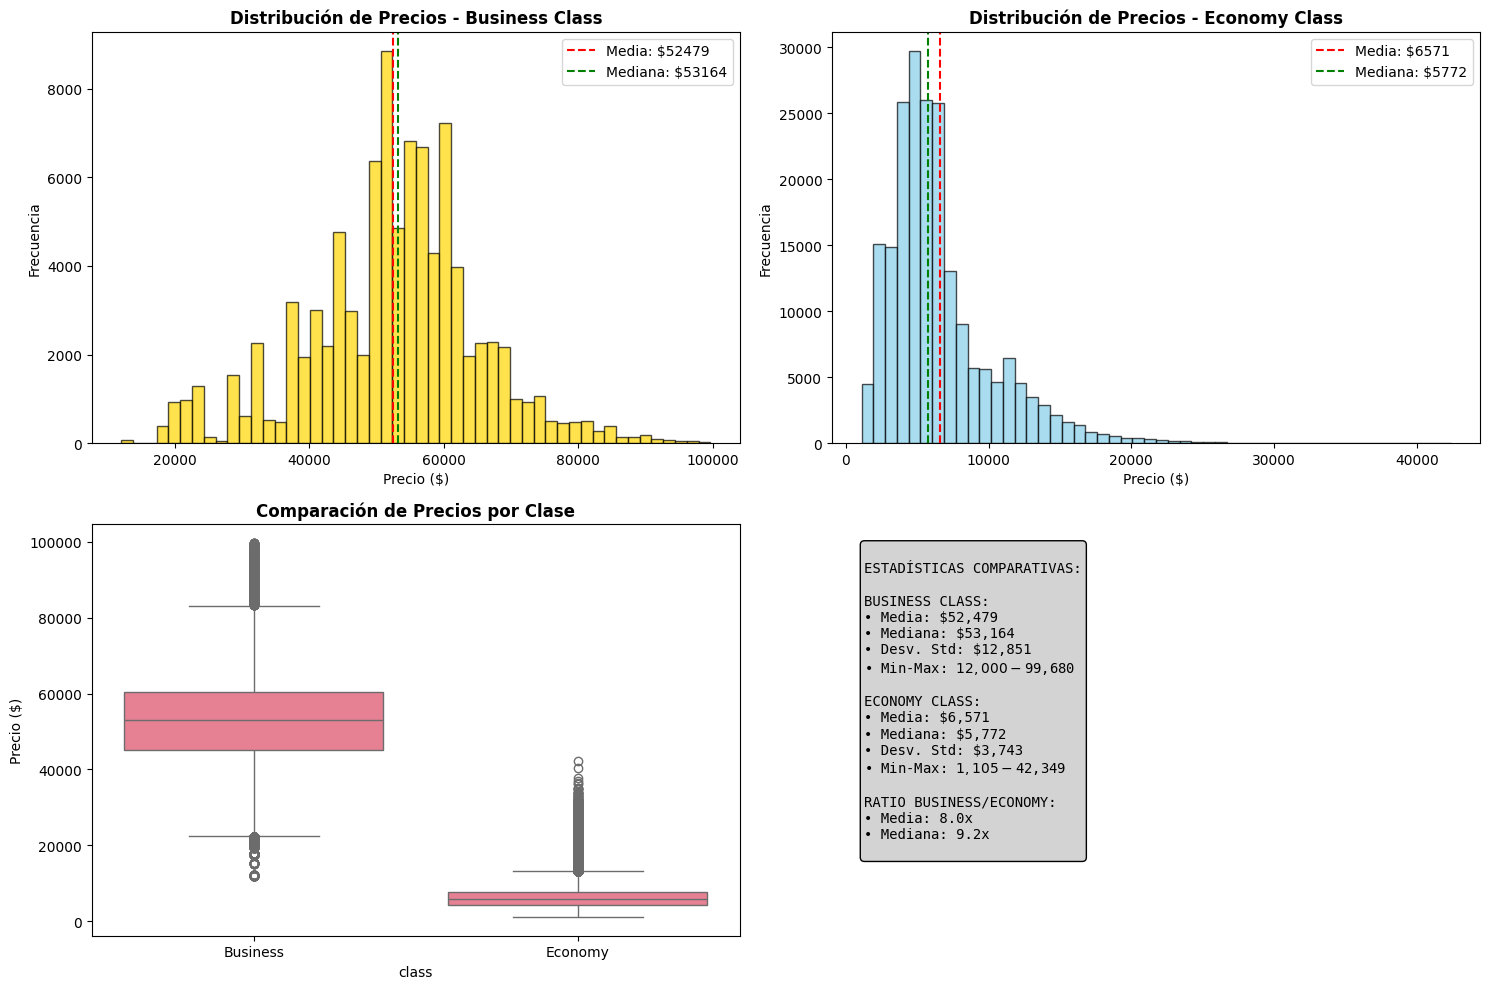


 3.1.2 ANÁLISIS DE VARIABLES CATEGÓRICAS
----------------------------------------

📊 AIRLINE:
   • Vistara: 127,859 (42.6%)
   • Air India: 80,894 (26.9%)
   • Indigo: 43,120 (14.4%)
   • GO FIRST: 23,177 (7.7%)
   • AirAsia: 16,098 (5.4%)
   • SpiceJet: 9,011 (3.0%)
   • StarAir: 61 (0.0%)
   • Trujet: 41 (0.0%)

📊 FROM:
   • Delhi: 61,345 (20.4%)
   • Mumbai: 60,903 (20.3%)
   • Bangalore: 52,106 (17.4%)
   • Kolkata: 46,347 (15.4%)
   • Hyderabad: 40,860 (13.6%)
   • Chennai: 38,700 (12.9%)

📊 TO:
   • Mumbai: 59,109 (19.7%)
   • Delhi: 57,361 (19.1%)
   • Bangalore: 51,112 (17.0%)
   • Kolkata: 49,535 (16.5%)
   • Hyderabad: 42,776 (14.2%)
   • Chennai: 40,368 (13.4%)

📊 STOP:
   • 1-stop
												
												: 243,603 (81.1%)
   • non-stop: 36,044 (12.0%)
   • 2+-stop: 13,288 (4.4%)
   • 1-stop
												Via IXU
												: 1,839 (0.6%)
   • 1-stop
												Via IDR
												: 1,398 (0.5%)
   • 1-stop
												Via Patna
												: 674 (0.2%)
   • 1-stop
							

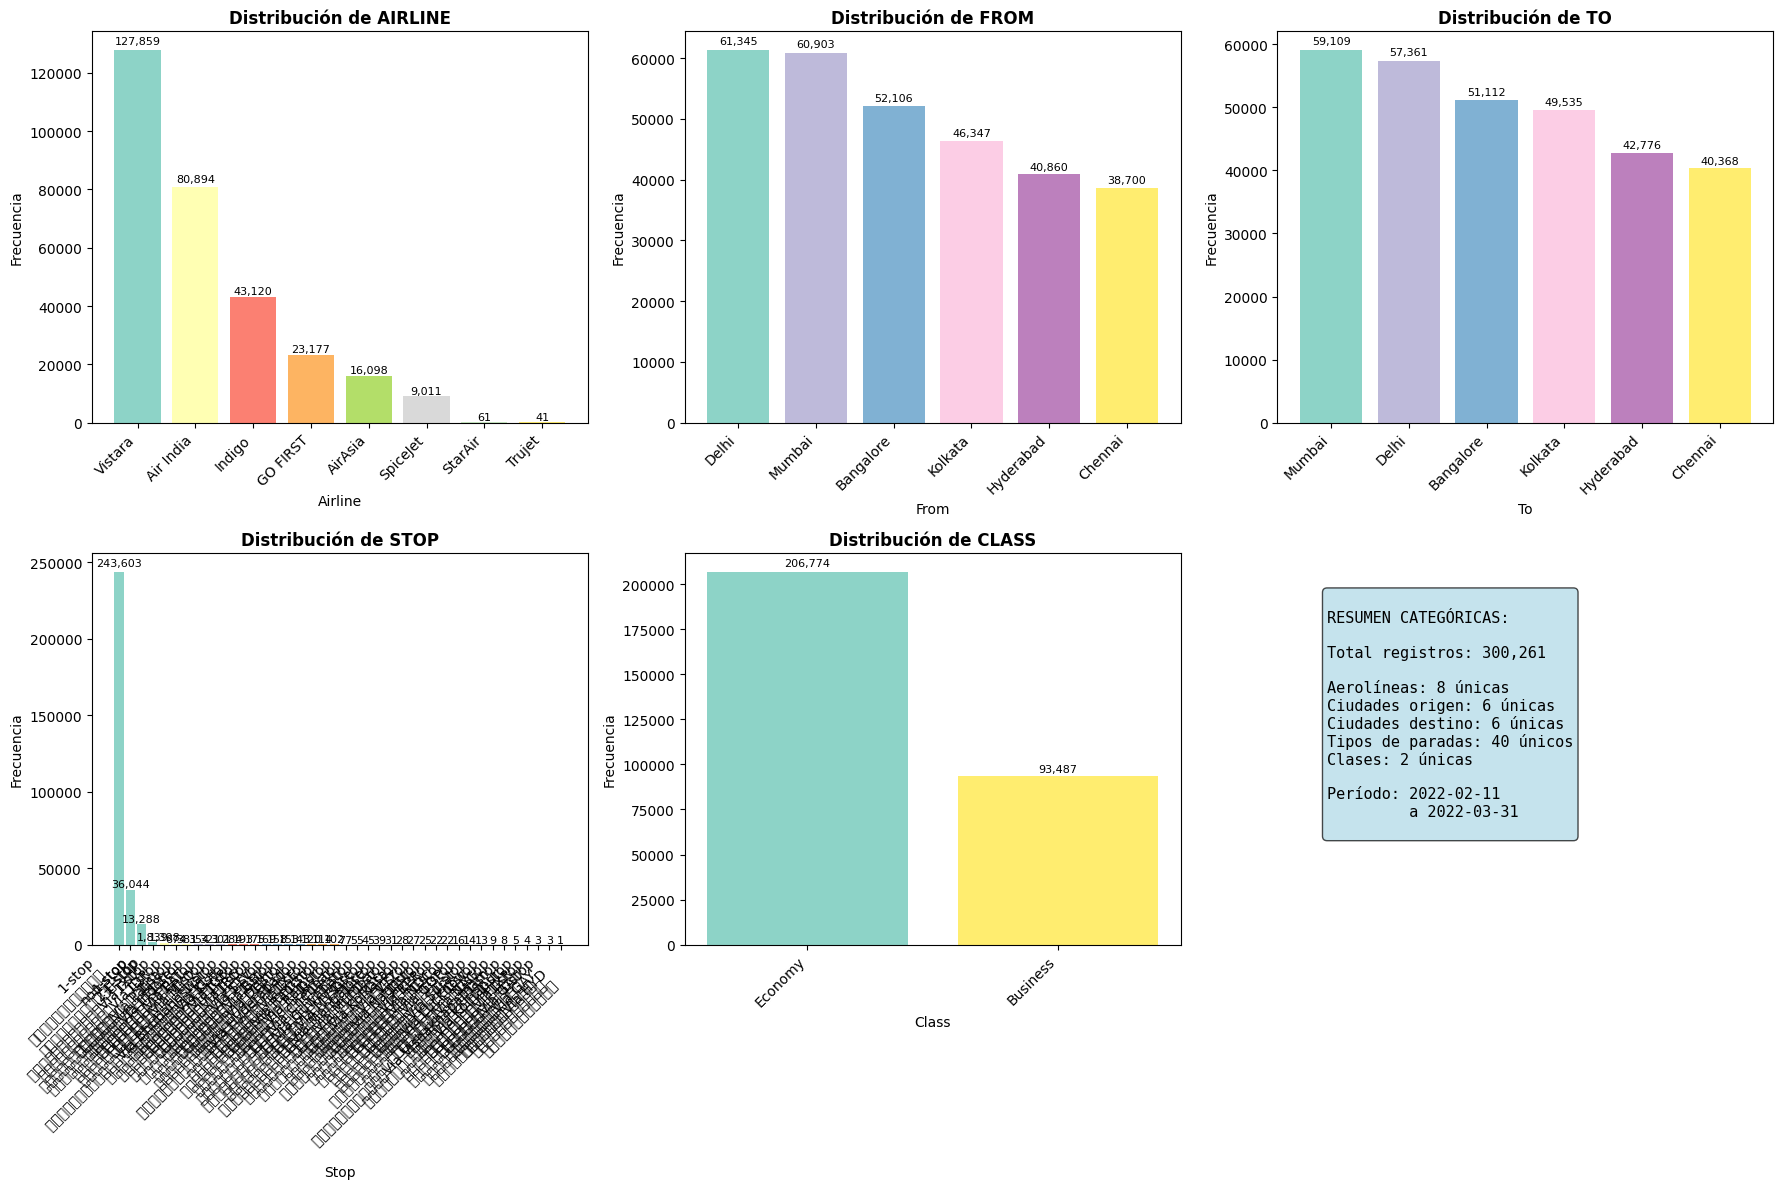


 3.1.3 ANÁLISIS DE VARIABLES TEMPORALES
----------------------------------------


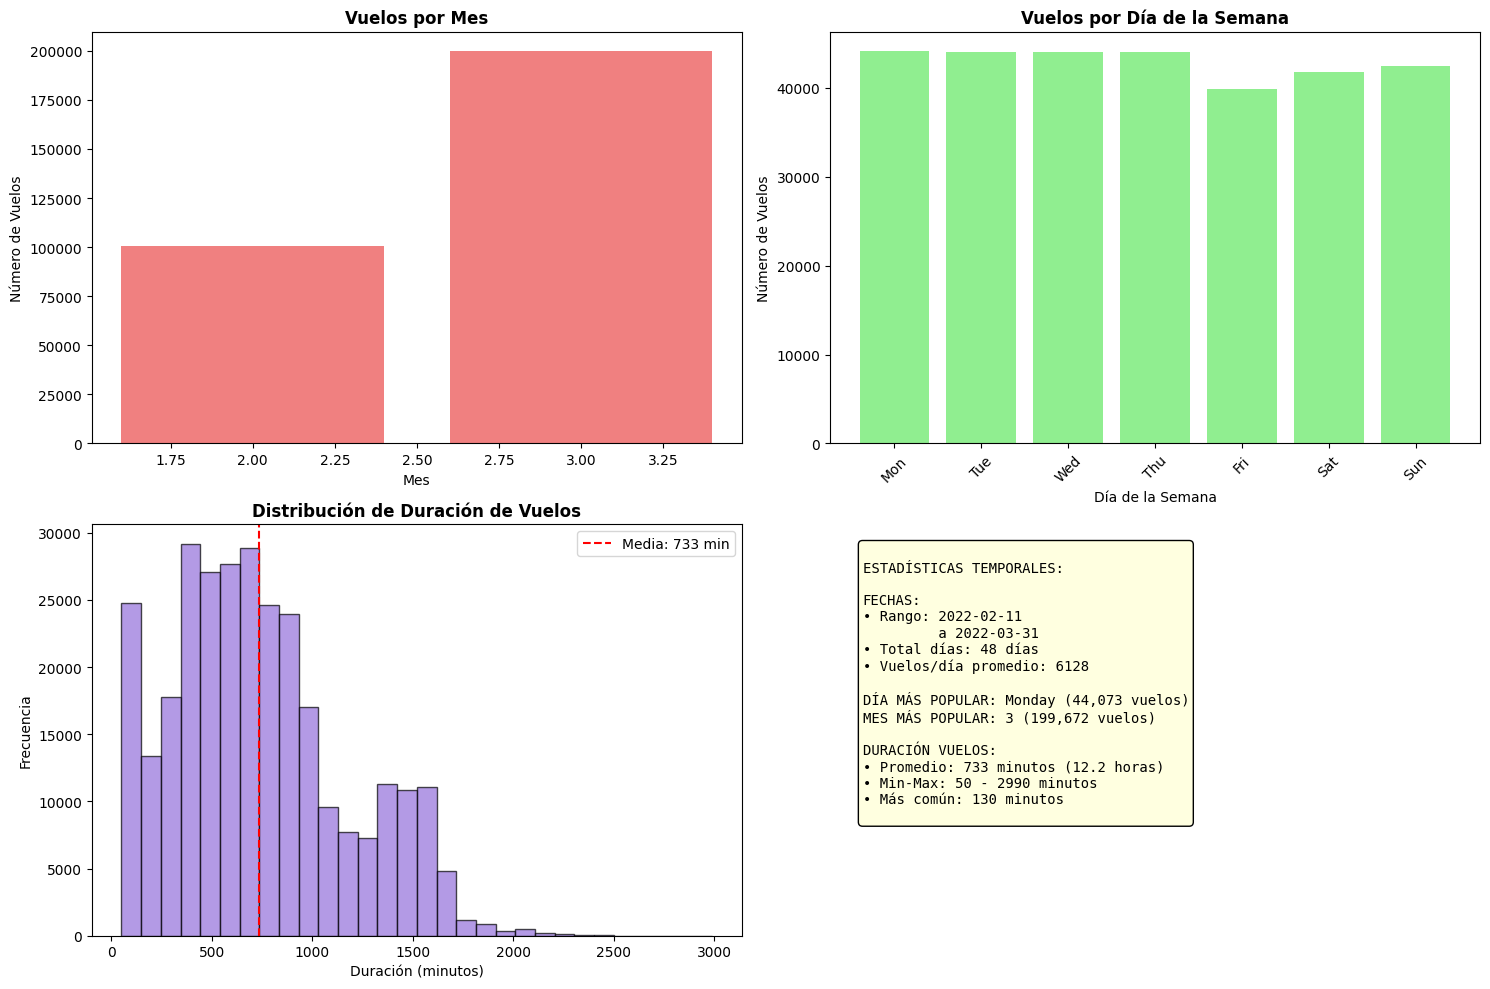

In [ ]:
# =============================================================================
# 3.1 ANÁLISIS UNIVARIADO
# =============================================================================
print("\n 3.1 ANÁLISIS UNIVARIADO")
print("-" * 50)

# 3.1.1 VARIABLE OBJETIVO: PRECIO
print("\n 3.1.1 ANÁLISIS DE LA VARIABLE OBJETIVO: PRECIO")
print("-" * 40)

def analizar_precio_por_clase(df):
    """Analiza la distribución de precios por clase de vuelo"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Separar por clase
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

    business_prices = df[df['class'] == 'Business']['price'].dropna()
    economy_prices = df[df['class'] == 'Economy']['price'].dropna()

    # Histograma Business
    axes[0,0].hist(business_prices, bins=50, alpha=0.7, color='gold', edgecolor='black')
    axes[0,0].set_title('Distribución de Precios - Business Class', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('Precio ($)')
    axes[0,0].set_ylabel('Frecuencia')
    axes[0,0].axvline(business_prices.mean(), color='red', linestyle='--', label=f'Media: ${business_prices.mean():.0f}')
    axes[0,0].axvline(business_prices.median(), color='green', linestyle='--', label=f'Mediana: ${business_prices.median():.0f}')
    axes[0,0].legend()

    # Histograma Economy
    axes[0,1].hist(economy_prices, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].set_title('Distribución de Precios - Economy Class', fontsize=12, fontweight='bold')
    axes[0,1].set_xlabel('Precio ($)')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].axvline(economy_prices.mean(), color='red', linestyle='--', label=f'Media: ${economy_prices.mean():.0f}')
    axes[0,1].axvline(economy_prices.median(), color='green', linestyle='--', label=f'Mediana: ${economy_prices.median():.0f}')
    axes[0,1].legend()

    # Box plot comparativo
    df_melted = df[['price', 'class']].dropna()
    sns.boxplot(data=df_melted, x='class', y='price', ax=axes[1,0])
    axes[1,0].set_title('Comparación de Precios por Clase', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('Precio ($)')

    # Estadísticas comparativas
    stats_text = f"""
ESTADÍSTICAS COMPARATIVAS:

BUSINESS CLASS:
• Media: ${business_prices.mean():,.0f}
• Mediana: ${business_prices.median():,.0f}
• Desv. Std: ${business_prices.std():,.0f}
• Min-Max: ${business_prices.min():,.0f} - ${business_prices.max():,.0f}

ECONOMY CLASS:
• Media: ${economy_prices.mean():,.0f}
• Mediana: ${economy_prices.median():,.0f}
• Desv. Std: ${economy_prices.std():,.0f}
• Min-Max: ${economy_prices.min():,.0f} - ${economy_prices.max():,.0f}

RATIO BUSINESS/ECONOMY:
• Media: {business_prices.mean()/economy_prices.mean():.1f}x
• Mediana: {business_prices.median()/economy_prices.median():.1f}x
    """

    axes[1,1].text(0.05, 0.95, stats_text, transform=axes[1,1].transAxes,
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    axes[1,1].axis('off')

    plt.tight_layout()
    plt.show()

    return business_prices, economy_prices

# Ejecutar análisis de precios
if 'df_combined' in locals():
    business_prices, economy_prices = analizar_precio_por_clase(df_combined)

# 3.1.2 VARIABLES CATEGÓRICAS
print("\n 3.1.2 ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("-" * 40)

def analizar_variables_categoricas(df):
    """Analiza la distribución de variables categóricas"""

    categoricas = ['airline', 'from', 'to', 'stop', 'class']

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, col in enumerate(categoricas):
        if col in df.columns:
            # Contar valores
            value_counts = df[col].value_counts()

            # Crear gráfico de barras
            ax = axes[i]
            bars = ax.bar(range(len(value_counts)), value_counts.values,
                         color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))

            ax.set_title(f'Distribución de {col.upper()}', fontsize=12, fontweight='bold')
            ax.set_xlabel(col.capitalize())
            ax.set_ylabel('Frecuencia')

            # Configurar etiquetas del eje x
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

            # Agregar etiquetas en las barras
            for bar, count in zip(bars, value_counts.values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                       f'{count:,}', ha='center', va='bottom', fontsize=8)

            print(f"\n📊 {col.upper()}:")
            for categoria, count in value_counts.items():
                porcentaje = (count/len(df))*100
                print(f"   • {categoria}: {count:,} ({porcentaje:.1f}%)")

    # Usar el último subplot para resumen
    axes[5].axis('off')
    resumen_text = f"""
RESUMEN CATEGÓRICAS:

Total registros: {len(df):,}

Aerolíneas: {df['airline'].nunique()} únicas
Ciudades origen: {df['from'].nunique()} únicas
Ciudades destino: {df['to'].nunique()} únicas
Tipos de paradas: {df['stop'].nunique()} únicos
Clases: {df['class'].nunique()} únicas

Período: {df['date'].min().strftime('%Y-%m-%d')}
         a {df['date'].max().strftime('%Y-%m-%d')}
    """

    axes[5].text(0.1, 0.9, resumen_text, transform=axes[5].transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    plt.tight_layout()
    plt.show()

# Ejecutar análisis categóricas
if 'df_combined' in locals():
    analizar_variables_categoricas(df_combined)

# 3.1.3 VARIABLES TEMPORALES
print("\n 3.1.3 ANÁLISIS DE VARIABLES TEMPORALES")
print("-" * 40)

def analizar_variables_temporales(df):
    """Analiza patrones temporales en los datos"""

    # Preparar datos temporales
    df_temp = df.copy()

    # Extraer componentes de fecha
    df_temp['mes'] = df_temp['date'].dt.month
    df_temp['dia_semana'] = df_temp['date'].dt.day_name()
    df_temp['semana'] = df_temp['date'].dt.isocalendar().week

    # Procesar time_taken si está disponible
    if 'time_taken' in df_temp.columns:
        # Función para convertir 'XXh XXm' a minutos
        def parsear_duracion(duracion_str):
            try:
                if pd.isna(duracion_str):
                    return np.nan
                # Extraer horas y minutos
                import re
                match = re.findall(r'(\d+)h\s*(\d+)m', str(duracion_str))
                if match:
                    horas, minutos = match[0]
                    return int(horas) * 60 + int(minutos)
                return np.nan
            except:
                return np.nan

        df_temp['duracion_minutos'] = df_temp['time_taken'].apply(parsear_duracion)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Distribución por mes
    monthly_counts = df_temp['mes'].value_counts().sort_index()
    axes[0,0].bar(monthly_counts.index, monthly_counts.values, color='lightcoral')
    axes[0,0].set_title('Vuelos por Mes', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('Mes')
    axes[0,0].set_ylabel('Número de Vuelos')

    # Distribución por día de la semana
    dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dia_counts = df_temp['dia_semana'].value_counts().reindex(dias_orden, fill_value=0)
    axes[0,1].bar(range(len(dia_counts)), dia_counts.values, color='lightgreen')
    axes[0,1].set_title('Vuelos por Día de la Semana', fontsize=12, fontweight='bold')
    axes[0,1].set_xlabel('Día de la Semana')
    axes[0,1].set_ylabel('Número de Vuelos')
    axes[0,1].set_xticks(range(len(dia_counts)))
    axes[0,1].set_xticklabels([d[:3] for d in dias_orden], rotation=45)

    # Distribución de duración de vuelos
    if 'duracion_minutos' in df_temp.columns:
        duraciones_validas = df_temp['duracion_minutos'].dropna()
        if len(duraciones_validas) > 0:
            axes[1,0].hist(duraciones_validas, bins=30, alpha=0.7, color='mediumpurple', edgecolor='black')
            axes[1,0].set_title('Distribución de Duración de Vuelos', fontsize=12, fontweight='bold')
            axes[1,0].set_xlabel('Duración (minutos)')
            axes[1,0].set_ylabel('Frecuencia')
            axes[1,0].axvline(duraciones_validas.mean(), color='red', linestyle='--',
                            label=f'Media: {duraciones_validas.mean():.0f} min')
            axes[1,0].legend()

    # Estadísticas temporales
    stats_temporales = f"""
ESTADÍSTICAS TEMPORALES:

FECHAS:
• Rango: {df_temp['date'].min().strftime('%Y-%m-%d')}
         a {df_temp['date'].max().strftime('%Y-%m-%d')}
• Total días: {(df_temp['date'].max() - df_temp['date'].min()).days} días
• Vuelos/día promedio: {len(df_temp)/(df_temp['date'].nunique()):.0f}

DÍA MÁS POPULAR: {dia_counts.idxmax()} ({dia_counts.max():,} vuelos)
MES MÁS POPULAR: {monthly_counts.idxmax()} ({monthly_counts.max():,} vuelos)
"""

    if 'duracion_minutos' in df_temp.columns and len(duraciones_validas) > 0:
        stats_temporales += f"""
DURACIÓN VUELOS:
• Promedio: {duraciones_validas.mean():.0f} minutos ({duraciones_validas.mean()/60:.1f} horas)
• Min-Max: {duraciones_validas.min():.0f} - {duraciones_validas.max():.0f} minutos
• Más común: {duraciones_validas.mode().iloc[0]:.0f} minutos
"""

    axes[1,1].text(0.05, 0.95, stats_temporales, transform=axes[1,1].transAxes,
                  fontsize=10, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
    axes[1,1].axis('off')

    plt.tight_layout()
    plt.show()

    return df_temp

# Ejecutar análisis temporal
if 'df_combined' in locals():
    df_temporal = analizar_variables_temporales(df_combined)



 3.2 ANÁLISIS BIVARIADO CON VARIABLE OBJETIVO
--------------------------------------------------

 3.2.1 PRECIO vs AEROLÍNEAS
------------------------------


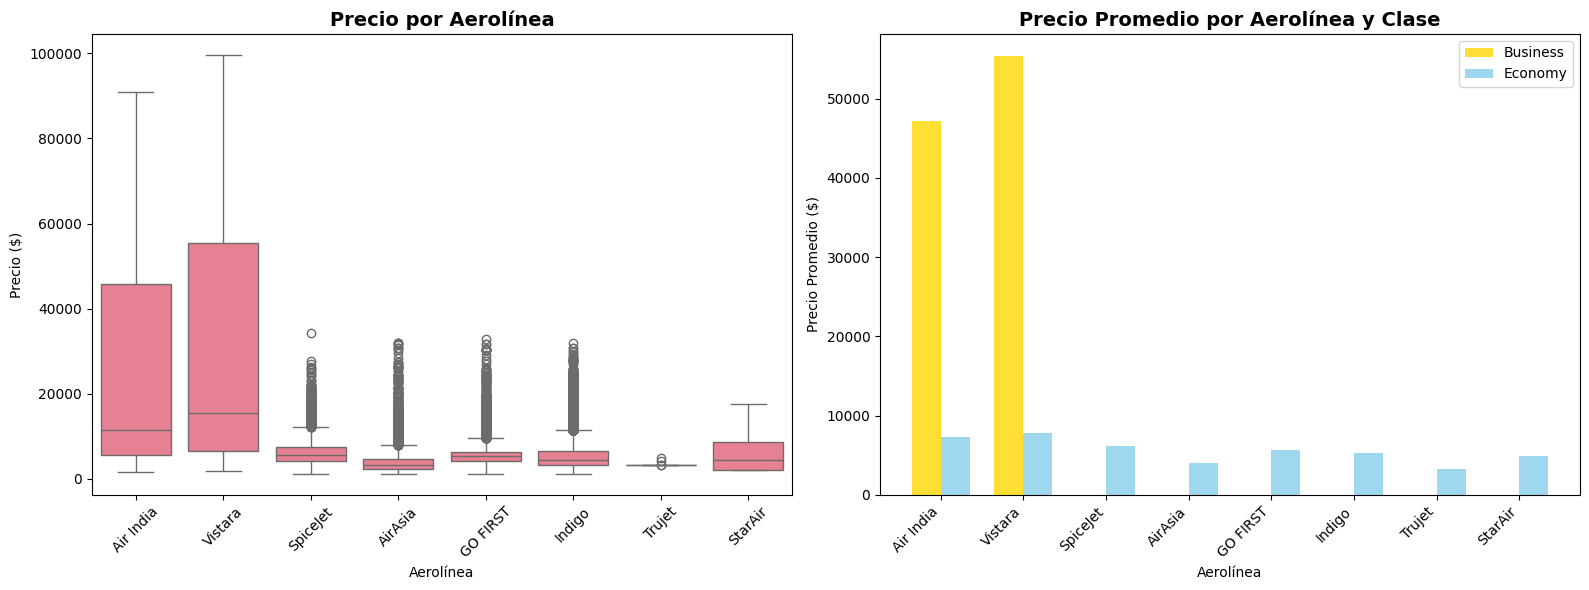


 ESTADÍSTICAS POR AEROLÍNEA:

 Air India:
   • Vuelos totales: 80,894
   • Precio promedio: $23507
   • Rango precios: $1526 - $90970
     • Business: 32,898 vuelos, promedio $47131
     • Economy: 47,996 vuelos, promedio $7314

 Vistara:
   • Vuelos totales: 127,751
   • Precio promedio: $30333
   • Rango precios: $1714 - $99680
     • Business: 60,481 vuelos, promedio $55388
     • Economy: 67,270 vuelos, promedio $7807

 SpiceJet:
   • Vuelos totales: 9,011
   • Precio promedio: $6179
   • Rango precios: $1106 - $34158
     • Economy: 9,011 vuelos, promedio $6179

 AirAsia:
   • Vuelos totales: 16,098
   • Precio promedio: $4091
   • Rango precios: $1105 - $31917
     • Economy: 16,098 vuelos, promedio $4091

 GO FIRST:
   • Vuelos totales: 23,177
   • Precio promedio: $5652
   • Rango precios: $1105 - $32803
     • Economy: 23,177 vuelos, promedio $5652

 Indigo:
   • Vuelos totales: 43,120
   • Precio promedio: $5324
   • Rango precios: $1105 - $31952
     • Economy: 43,120 vuelo

In [ ]:
# =============================================================================
# 3.2 ANÁLISIS BIVARIADO
# =============================================================================

print("\n 3.2 ANÁLISIS BIVARIADO CON VARIABLE OBJETIVO")
print("-" * 50)

# 3.2.1 PRECIO vs AEROLÍNEAS
print("\n 3.2.1 PRECIO vs AEROLÍNEAS")
print("-" * 30)

def analizar_precio_vs_aerolineas(df):
    """Analiza la relación entre precio y aerolíneas"""

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Box plot precio vs aerolínea
    df_clean = df.dropna(subset=['price'])
    sns.boxplot(data=df_clean, x='airline', y='price', ax=axes[0])
    axes[0].set_title('Precio por Aerolínea', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Aerolínea')
    axes[0].set_ylabel('Precio ($)')
    axes[0].tick_params(axis='x', rotation=45)

    # Precio promedio por aerolínea y clase
    precio_promedio = df_clean.groupby(['airline', 'class'])['price'].agg(['mean', 'count']).round(0)
    precio_promedio = precio_promedio.reset_index()

    # Gráfico de barras agrupadas
    business_data = precio_promedio[precio_promedio['class'] == 'Business']
    economy_data = precio_promedio[precio_promedio['class'] == 'Economy']

    x = np.arange(len(df_clean['airline'].unique()))
    width = 0.35

    # Preparar datos para el gráfico
    airlines = df_clean['airline'].unique()
    business_means = []
    economy_means = []

    for airline in airlines:
        bus_mean = business_data[business_data['airline'] == airline]['mean']
        eco_mean = economy_data[economy_data['airline'] == airline]['mean']
        business_means.append(bus_mean.iloc[0] if len(bus_mean) > 0 else 0)
        economy_means.append(eco_mean.iloc[0] if len(eco_mean) > 0 else 0)

    axes[1].bar(x - width/2, business_means, width, label='Business', color='gold', alpha=0.8)
    axes[1].bar(x + width/2, economy_means, width, label='Economy', color='skyblue', alpha=0.8)
    axes[1].set_title('Precio Promedio por Aerolínea y Clase', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Aerolínea')
    axes[1].set_ylabel('Precio Promedio ($)')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(airlines, rotation=45, ha='right')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # Imprimir estadísticas
    print("\n ESTADÍSTICAS POR AEROLÍNEA:")
    for airline in airlines:
        airline_data = df_clean[df_clean['airline'] == airline]
        if len(airline_data) > 0:
            print(f"\n {airline}:")
            print(f"   • Vuelos totales: {len(airline_data):,}")
            print(f"   • Precio promedio: ${airline_data['price'].mean():.0f}")
            print(f"   • Rango precios: ${airline_data['price'].min():.0f} - ${airline_data['price'].max():.0f}")

            # Por clase si aplica
            for clase in ['Business', 'Economy']:
                clase_data = airline_data[airline_data['class'] == clase]
                if len(clase_data) > 0:
                    print(f"     • {clase}: {len(clase_data):,} vuelos, promedio ${clase_data['price'].mean():.0f}")

# Ejecutar análisis precio vs aerolíneas
if 'df_combined' in locals():
    analizar_precio_vs_aerolineas(df_combined)




### **CONCLUSIONES PRINCIPALES DEL ANÁLISIS EXPLORATORIO:**

1️⃣ **DIFERENCIACIÓN CLARA ENTRE CLASES:**
   - Business Class: Media (52,479), rango (12,000 - 99,680)
   - Economy Class: Media (6,571), rango (1,105 - 42,349)
   - Ratio Business/Economy: 8.0x más caro en promedio
   - Distribución Economy más concentrada, Business más dispersa

2️⃣ **DOMINANCIA DE MERCADO POR AEROLÍNEAS:**
   - Vistara lidera con 42.6% del mercado (127,859 vuelos)
   - Air India segundo lugar con 26.9% (80,894 vuelos)
   - Solo 2 aerolíneas (Air India, Vistara) operan Business Class
   - 6 aerolíneas restantes solo operan Economy Class
   - Segmentación clara: Premium vs Low-Cost carriers

3️⃣ **EQUILIBRIO GEOGRÁFICO EN RUTAS:**
   - 6 ciudades principales con distribución balanceada
   - Delhi y Mumbai principales hubs (20.4% y 20.3% respectivamente)
   - Sin concentración excesiva en rutas específicas
   - Mercado doméstico bien distribuido geográficamente

4️⃣ **PATRONES TEMPORALES ESTABLES:**
   - Distribución uniforme entre días de semana
   - Concentración en marzo (199,672 vuelos vs 100,589 febrero)
   - Duración promedio: 733 minutos (12.2 horas)
   - Rango duración: 50 minutos a 49.8 horas

5️⃣ **ESTRUCTURA DE PRECIOS POR AEROLÍNEA:**
   - Vistara: Aerolínea más cara (promedio 30,333)
   - Air India: Segunda más cara (promedio 23,507)
   - Low-cost: AirAsia más barata (promedio 4,091)
   - Correlación clara entre tipo de aerolínea y pricing

⚠️ **PROBLEMA CRÍTICO IDENTIFICADO - VARIABLE 'STOP':**
   - 40 categorías diferentes debido a datos sucios
   - Caracteres de control (\n, \t) contaminando los datos
   - Información redundante: '1-stop' vs '1-stop Via [aeropuerto]'
   - Solo 3 categorías reales: non-stop (12%), 1-stop (81%), 2+-stop (4.4%)
   - REQUIERE LIMPIEZA URGENTE antes del modelado

**IMPLICACIONES PARA EL MODELADO:**
   - Variable 'class' será altamente predictiva del precio
   - 'airline' tendrá poder predictivo significativo
   - Variables temporales muestran patrones explotables
   - 'stop' necesita recodificación a 3 categorías limpias
   - Outliers en precios son válidos (no errores de medición)

**ACCIONES INMEDIATAS REQUERIDAS:**

1️⃣ **LIMPIEZA URGENTE DE 'STOP':**
   - Eliminar caracteres de control (\n, \t, espacios extra)
   - Reagrupar en 3 categorías: 'non-stop', '1-stop', '2+-stop'
   - Extraer información 'Via [aeropuerto]' como feature separado (opcional)
   - Validar que sume 100% después de limpieza

2️⃣ **VALIDACIÓN DE COHERENCIA:**
   - Verificar que Business Class solo en Air India y Vistara
   - Confirmar rangos de precios por aerolínea y clase
   - Validar duraciones extremas (vuelos de 49+ horas)

3️⃣ **INGENIERÍA DE FEATURES SUGERIDA:**
   - Crear 'es_low_cost' = 1 si aerolínea en [SpiceJet, AirAsia, GO FIRST, Indigo]
   - Crear 'ruta_popular' basado en frecuencia from-to
   - Extraer 'mes', 'dia_semana' de fecha
   - Convertir 'duracion_minutos' de format 'XXh XXm'

4️⃣ **ESTRATEGIA DE MODELADO:**
   - Considerar modelos separados por clase (Business vs Economy)
   - One-Hot Encoding para aerolíneas (8 categorías manejables)
   - Target Encoding para rutas si se requiere
   - Transformación logarítmica de precios para reducir asimetría

## **PASO 4: ANÁLISIS DE CORRELACIONES**

In [ ]:
# =============================================================================
# PASO 4: ANÁLISIS DE CORRELACIONES
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [ ]:
# =============================================================================
# 4.0 PREPARACIÓN DE DATOS PARA ANÁLISIS DE CORRELACIONES
# =============================================================================

print("\n 4.0 PREPARACIÓN DE DATOS PARA ANÁLISIS")
print("-" * 50)

def preparar_datos_correlaciones():
    """Prepara los datos limpiando la variable stop y creando variables numéricas"""

    try:
        # Intentar usar los datasets del paso anterior
        if 'df_combined' in locals():
            df = df_combined.copy()
        else:
            # Cargar y preparar datos
            print(" Cargando datasets...")
            business_df = pd.read_excel('business.xlsx')
            economy_df = pd.read_excel('economy.xlsx')

            business_df['class'] = 'Business'
            economy_df['class'] = 'Economy'

            business_df['price'] = pd.to_numeric(business_df['price'], errors='coerce')

            df = pd.concat([business_df, economy_df], ignore_index=True)

        print(f"Dataset combinado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

        # PASO CRÍTICO: Limpiar variable 'stop'
        print("\n Limpiando variable 'stop'...")

        def limpiar_stop(valor_stop):
            """Limpia y estandariza la variable stop"""
            if pd.isna(valor_stop):
                return 'unknown'

            valor_str = str(valor_stop).lower().strip()

            # Eliminar caracteres de control y espacios extra
            import re
            valor_limpio = re.sub(r'[\n\t\r]+', ' ', valor_str)
            valor_limpio = re.sub(r'\s+', ' ', valor_limpio).strip()

            # Clasificar en categorías principales
            if 'non-stop' in valor_limpio or 'nonstop' in valor_limpio:
                return 'non-stop'
            elif '2+' in valor_limpio or '2-stop' in valor_limpio or '3-stop' in valor_limpio:
                return '2+-stop'
            elif '1-stop' in valor_limpio or 'via' in valor_limpio:
                return '1-stop'
            else:
                return 'unknown'

        # Aplicar limpieza
        df['stop_clean'] = df['stop'].apply(limpiar_stop)

        # Verificar resultado de la limpieza
        print(" Distribución de 'stop' después de limpieza:")
        stop_counts = df['stop_clean'].value_counts()
        for categoria, count in stop_counts.items():
            porcentaje = (count/len(df))*100
            print(f"   • {categoria}: {count:,} ({porcentaje:.1f}%)")

        # Crear variables numéricas adicionales
        print("\n🔢 Creando variables numéricas para correlación...")

        # Codificar variables categóricas
        le_airline = LabelEncoder()
        le_from = LabelEncoder()
        le_to = LabelEncoder()
        le_class = LabelEncoder()
        le_stop = LabelEncoder()

        df['airline_encoded'] = le_airline.fit_transform(df['airline'])
        df['from_encoded'] = le_from.fit_transform(df['from'])
        df['to_encoded'] = le_to.fit_transform(df['to'])
        df['class_encoded'] = le_class.fit_transform(df['class'])
        df['stop_encoded'] = le_stop.fit_transform(df['stop_clean'])

        # Extraer características temporales
        df['mes'] = df['date'].dt.month
        df['dia_semana'] = df['date'].dt.dayofweek  # 0=Lunes, 6=Domingo
        df['semana_año'] = df['date'].dt.isocalendar().week

        # Parsear duración de vuelos
        def parsear_duracion(duracion_str):
            try:
                if pd.isna(duracion_str):
                    return np.nan
                import re
                match = re.findall(r'(\d+)h\s*(\d+)m', str(duracion_str))
                if match:
                    horas, minutos = match[0]
                    return int(horas) * 60 + int(minutos)
                return np.nan
            except:
                return np.nan

        df['duracion_minutos'] = df['time_taken'].apply(parsear_duracion)

        print("✅ Variables numéricas creadas:")
        vars_numericas = ['price', 'num_code', 'airline_encoded', 'from_encoded',
                         'to_encoded', 'class_encoded', 'stop_encoded', 'mes',
                         'dia_semana', 'duracion_minutos']

        for var in vars_numericas:
            if var in df.columns:
                validos = df[var].notna().sum()
                print(f"   • {var}: {validos:,} valores válidos")

        return df, le_airline, le_from, le_to, le_class, le_stop

    except Exception as e:
        print(f" Error preparando datos: {e}")
        return None, None, None, None, None, None

# Ejecutar preparación
df_correlacion, le_airline, le_from, le_to, le_class, le_stop = preparar_datos_correlaciones()



 4.0 PREPARACIÓN DE DATOS PARA ANÁLISIS
--------------------------------------------------
 Cargando datasets...
Dataset combinado: 300,261 filas × 12 columnas

 Limpiando variable 'stop'...
 Distribución de 'stop' después de limpieza:
   • 1-stop: 250,929 (83.6%)
   • non-stop: 36,044 (12.0%)
   • 2+-stop: 13,288 (4.4%)

🔢 Creando variables numéricas para correlación...
✅ Variables numéricas creadas:
   • price: 300,153 valores válidos
   • num_code: 300,261 valores válidos
   • airline_encoded: 300,261 valores válidos
   • from_encoded: 300,261 valores válidos
   • to_encoded: 300,261 valores válidos
   • class_encoded: 300,261 valores válidos
   • stop_encoded: 300,261 valores válidos
   • mes: 300,261 valores válidos
   • dia_semana: 300,261 valores válidos
   • duracion_minutos: 300,257 valores válidos



 4.1 ANÁLISIS DE CORRELACIÓN - VARIABLES NUMÉRICAS
--------------------------------------------------
 Analizando correlaciones con 300,149 registros válidos


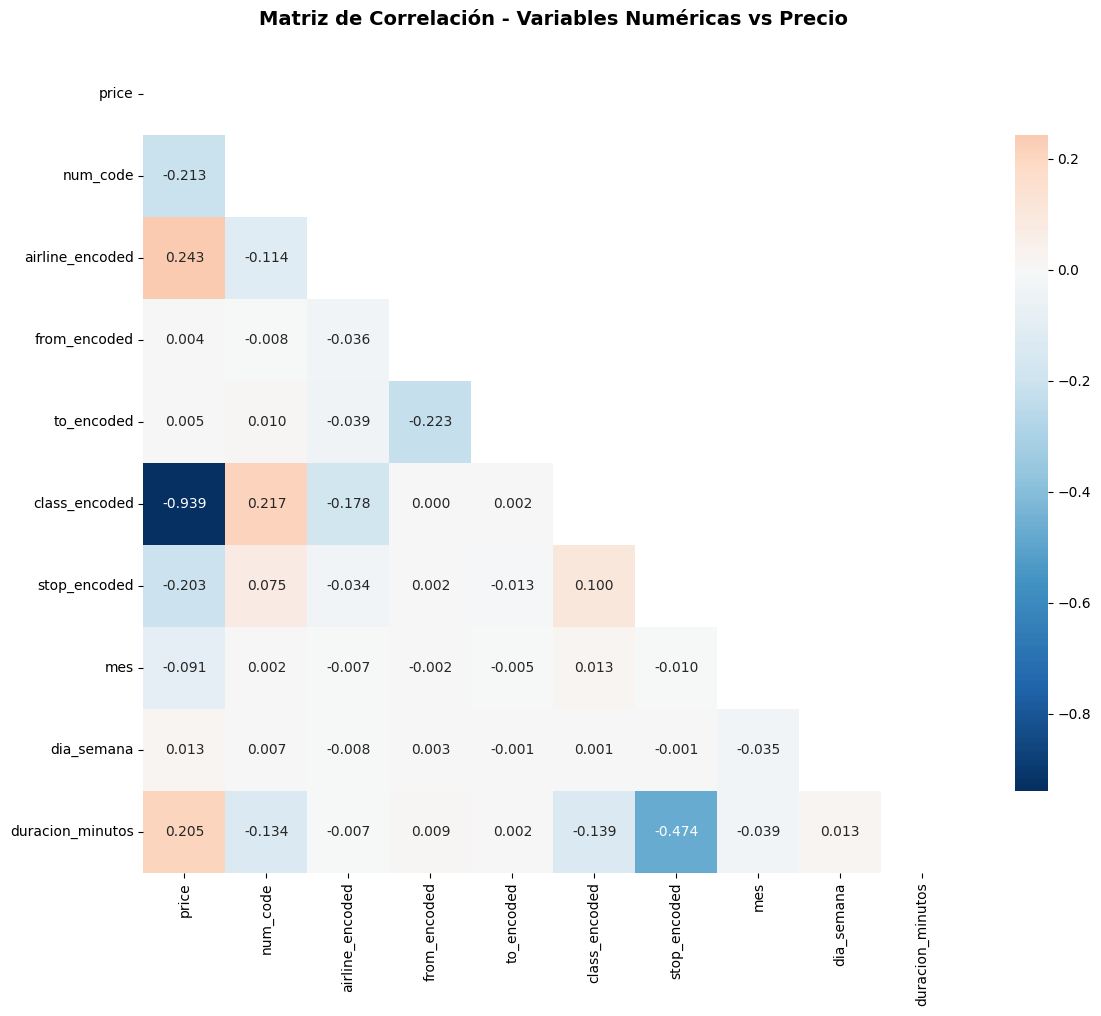


 CORRELACIONES CON PRECIO (ordenadas por fuerza):
   • class_encoded     : -0.939 (fuerte negativa)
   • airline_encoded   :  0.243 (débil positiva)
   • num_code          : -0.213 (débil negativa)
   • duracion_minutos  :  0.205 (débil positiva)
   • stop_encoded      : -0.203 (débil negativa)
   • mes               : -0.091 (débil negativa)
   • dia_semana        :  0.013 (débil positiva)
   • to_encoded        :  0.005 (débil positiva)
   • from_encoded      :  0.004 (débil positiva)

 4.2 ANÁLISIS DE ASOCIACIÓN - VARIABLES CATEGÓRICAS
--------------------------------------------------
 Test ANOVA - Asociación con Precio:
(F-statistic alto = mayor asociación con precio)
   • airline        : F=12295.92, p=0.00e+00 ***
   • from           : F=  144.89, p=3.94e-154 ***
   • to             : F=  193.41, p=1.79e-206 ***
   • stop_clean     : F= 6521.64, p=0.00e+00 ***
   • class          : F=2221418.60, p=0.00e+00 ***

 AIRLINE - Precio promedio por categoría:
   • Air India: $23,507
 

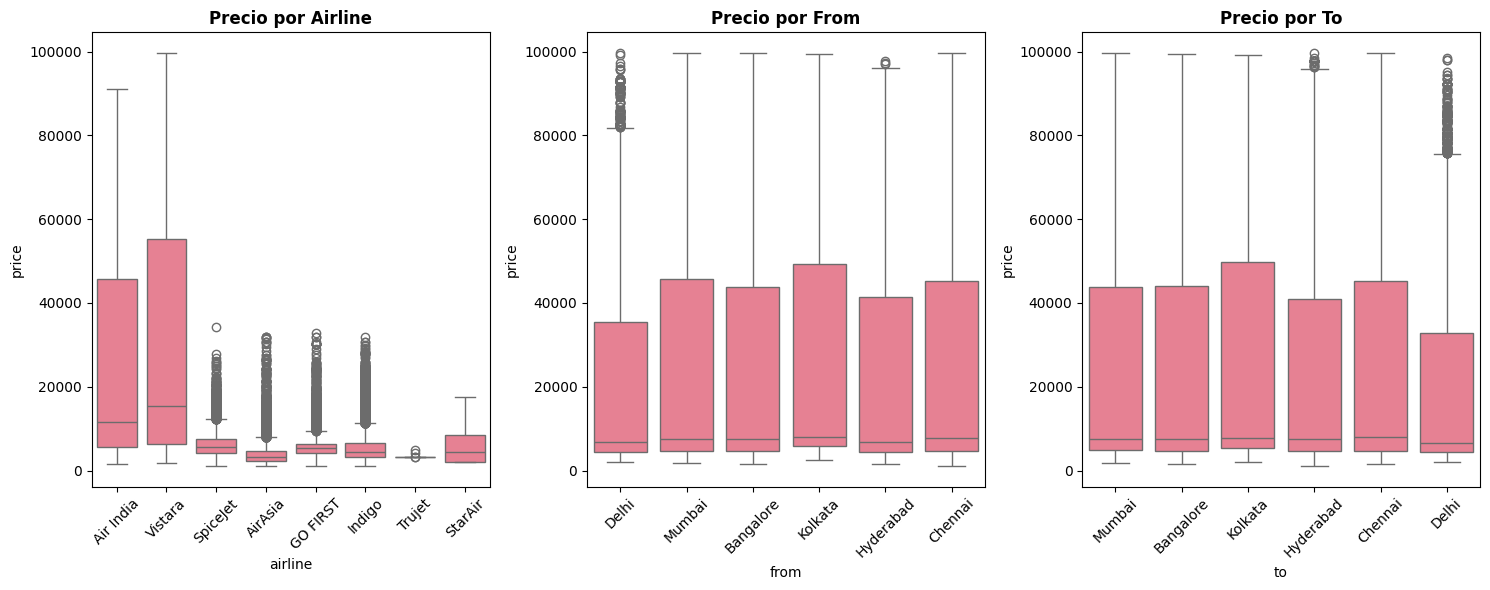

In [ ]:
# =============================================================================
# 4.1 MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS
# =============================================================================
print("\n 4.1 ANÁLISIS DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("-" * 50)

def analizar_correlacion_numericas(df):
    """Analiza correlaciones entre variables numéricas y precio"""

    # Seleccionar variables numéricas relevantes
    vars_numericas = ['price', 'num_code', 'airline_encoded', 'from_encoded',
                     'to_encoded', 'class_encoded', 'stop_encoded', 'mes',
                     'dia_semana', 'duracion_minutos']

    # Filtrar variables que existen y tienen datos
    vars_disponibles = [var for var in vars_numericas if var in df.columns and df[var].notna().sum() > 0]

    # Crear subset para correlación
    df_corr = df[vars_disponibles].copy()

    # Eliminar filas con valores nulos
    df_corr = df_corr.dropna()

    print(f" Analizando correlaciones con {len(df_corr):,} registros válidos")

    # Calcular matriz de correlación
    correlation_matrix = df_corr.corr()

    # Visualización de la matriz de correlación
    plt.figure(figsize=(12, 10))

    # Crear máscara para el triángulo superior
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Crear heatmap
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8},
                mask=mask)

    plt.title('Matriz de Correlación - Variables Numéricas vs Precio',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Análisis específico con precio
    print("\n CORRELACIONES CON PRECIO (ordenadas por fuerza):")
    correlaciones_precio = correlation_matrix['price'].abs().sort_values(ascending=False)

    for var, corr in correlaciones_precio.items():
        if var != 'price':
            direccion = "positiva" if correlation_matrix['price'][var] > 0 else "negativa"
            fuerza = "fuerte" if abs(corr) > 0.7 else "moderada" if abs(corr) > 0.3 else "débil"
            print(f"   • {var:<18}: {correlation_matrix['price'][var]:6.3f} ({fuerza} {direccion})")

    return correlation_matrix, correlaciones_precio

# Ejecutar análisis de correlaciones numéricas
if df_correlacion is not None:
    matriz_corr, corr_precio = analizar_correlacion_numericas(df_correlacion)

# =============================================================================
# 4.2 ANÁLISIS DE ASOCIACIÓN - VARIABLES CATEGÓRICAS
# =============================================================================

print("\n 4.2 ANÁLISIS DE ASOCIACIÓN - VARIABLES CATEGÓRICAS")
print("-" * 50)

def analizar_asociacion_categoricas(df):
    """Analiza la asociación entre variables categóricas y precio usando ANOVA"""

    from scipy.stats import f_oneway

    variables_cat = ['airline', 'from', 'to', 'stop_clean', 'class']
    resultados_anova = {}

    print(" Test ANOVA - Asociación con Precio:")
    print("(F-statistic alto = mayor asociación con precio)")

    for var in variables_cat:
        if var in df.columns:
            try:
                # Preparar grupos para ANOVA
                grupos = []
                categorias = df[var].unique()

                for categoria in categorias:
                    if pd.notna(categoria):
                        grupo_precios = df[df[var] == categoria]['price'].dropna()
                        if len(grupo_precios) >= 2:  # Mínimo 2 valores por grupo
                            grupos.append(grupo_precios)

                if len(grupos) >= 2:
                    # Ejecutar ANOVA
                    f_stat, p_value = f_oneway(*grupos)

                    resultados_anova[var] = {
                        'f_statistic': f_stat,
                        'p_value': p_value,
                        'significativo': p_value < 0.05
                    }

                    significancia = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""

                    print(f"   • {var:<15}: F={f_stat:8.2f}, p={p_value:.2e} {significancia}")

            except Exception as e:
                print(f"   • {var:<15}: Error en cálculo - {str(e)[:30]}...")

    # Visualización: Box plots de las variables más significativas
    vars_significativas = [var for var, result in resultados_anova.items()
                          if result['significativo'] and result['f_statistic'] > 100]

    if vars_significativas:
        n_vars = len(vars_significativas)
        fig, axes = plt.subplots(1, min(n_vars, 3), figsize=(15, 6))

        if n_vars == 1:
            axes = [axes]
        elif n_vars == 2:
            axes = axes
        else:
            axes = axes[:3]  # Máximo 3 gráficos

        for i, var in enumerate(vars_significativas[:3]):
            df_clean = df[[var, 'price']].dropna()

            sns.boxplot(data=df_clean, x=var, y='price', ax=axes[i])
            axes[i].set_title(f'Precio por {var.capitalize()}', fontweight='bold')
            axes[i].tick_params(axis='x', rotation=45)

            # Estadísticas por grupo
            medias_grupo = df_clean.groupby(var)['price'].mean().round(0)
            print(f"\n {var.upper()} - Precio promedio por categoría:")
            for categoria, media in medias_grupo.items():
                print(f"   • {categoria}: ${media:,.0f}")

        plt.tight_layout()
        plt.show()

    return resultados_anova

# Ejecutar análisis de asociación categóricas
if df_correlacion is not None:
    resultados_anova = analizar_asociacion_categoricas(df_correlacion)

### **Conclusiones del Análisis de Correlaciones**

Variables con Mayor Poder Predictivo

El análisis de correlaciones revela un panorama claro sobre las variables más importantes para predecir el precio de los vuelos:

**1. Variable Clase (class_encoded)**
- Correlación: -0.939 (fuerte negativa)
- F-statistic ANOVA: 2,221,418.60
- Interpretación: La clase del vuelo es el predictor más poderoso del precio. La correlación negativa se debe al encoding (Business=0, Economy=1), confirmando que Business es significativamente más caro.

**2. Variable Aerolínea (airline)**

- Correlación: 0.243 (débil positiva)
- F-statistic ANOVA: 12,295.92
- Diferencias significativas:
    - Premium: Vistara ($30,333) y Air India ($23,507)
    - Low-cost: Trujet ($3,245), AirAsia ($4,091), Indigo ($5,324)
    - Rango de precios: 10x diferencia entre aerolíneas más cara y más barata

**3. Variable Tipo de Paradas (stop_clean)**

- Correlación: -0.203 (débil negativa)
- F-statistic ANOVA: 6,521.64
- Interpretación: Los vuelos con paradas tienden a ser más baratos que los directos

**Variables con Influencia Moderada**

**Rutas Geográficas (from/to)**
  - F-statistics: FROM (144.89), TO (193.41)
  - Patrón identificado:
      - Delhi como origen/destino más económico ($18,916/$18,405)
      - Chennai y Kolkata como rutas más caras (~$21,900)
      - Diferencia del 20% entre rutas más baratas y más caras

**Duración del Vuelo**

- Correlación: 0.205 (débil positiva)
- Interpretación: Vuelos más largos tienden a ser más caros, pero la relación es débil

**Variables con Baja Influencia Predictiva**
Las variables temporales (mes, día de la semana) y el código numérico del vuelo muestran correlaciones muy débiles (< 0.1 ), sugiriendo que:

- No hay estacionalidad marcada en los precios
- Los patrones semanales son mínimos
- El número de vuelo no es indicativo del precio

**Implicaciones para el Modelado**

**Jerarquía de Variables:** Clase > Aerolínea > Tipo de paradas > Rutas > Duración

**Feature Engineering:** Las variables categóricas (clase, aerolínea) serán más importantes que las numéricas

**Estrategia de Modelado:** Considerar modelos que manejen bien variables categóricas con alta cardinalidad

**Reducción de Dimensionalidad:** Las variables temporales podrían eliminarse sin impacto significativo

El análisis confirma que el mercado de vuelos está principalmente segmentado por clase de servicio y tipo de aerolínea, con influencia secundaria de factores geográficos y operacionales.ReintentarClaude puede cometer errores. Por favor, verifique las respuestas.

In [ ]:
# =============================================================================
# 4.3 RANKING DE IMPORTANCIA Y SELECCIÓN DE CARACTERÍSTICAS
# =============================================================================

print("\n 4.3 RANKING DE IMPORTANCIA Y SELECCIÓN DE CARACTERÍSTICAS")
print("-" * 50)

def generar_ranking_importancia(correlaciones_precio, resultados_anova):
    """Genera un ranking consolidado de importancia de variables"""

    print(" RANKING DE IMPORTANCIA DE VARIABLES PARA PREDICCIÓN DE PRECIO:")
    print("=" * 70)

    # Combinar resultados numéricos y categóricos
    ranking = []

    # Variables categóricas (basado en F-statistic de ANOVA)
    for var, stats in resultados_anova.items():
        if stats['significativo']:
            ranking.append({
                'variable': var,
                'tipo': 'categórica',
                'metrica': stats['f_statistic'],
                'metrica_tipo': 'F-statistic',
                'significancia': '***' if stats['p_value'] < 0.001 else '**' if stats['p_value'] < 0.01 else '*'
            })

    # Variables numéricas (basado en correlación absoluta)
    for var, corr in correlaciones_precio.items():
        if var != 'price' and abs(corr) > 0.01:  # Filtrar correlaciones muy débiles
            ranking.append({
                'variable': var,
                'tipo': 'numérica',
                'metrica': abs(corr),
                'metrica_tipo': 'Correlación',
                'significancia': 'Alta' if abs(corr) > 0.7 else 'Media' if abs(corr) > 0.3 else 'Baja'
            })

    # Ordenar por métrica (F-statistic para categóricas, correlación para numéricas)
    ranking_categoricas = sorted([r for r in ranking if r['tipo'] == 'categórica'],
                                key=lambda x: x['metrica'], reverse=True)
    ranking_numericas = sorted([r for r in ranking if r['tipo'] == 'numérica'],
                              key=lambda x: x['metrica'], reverse=True)

    # Mostrar ranking
    print("\n🥇 TOP VARIABLES CATEGÓRICAS (por F-statistic):")
    for i, var in enumerate(ranking_categoricas, 1):
        print(f"   {i}. {var['variable']:<15}: F={var['metrica']:>10,.0f} {var['significancia']}")

    print("\n🥈 TOP VARIABLES NUMÉRICAS (por Correlación Absoluta):")
    for i, var in enumerate(ranking_numericas, 1):
        correlacion_original = correlaciones_precio[var['variable']]
        direccion = "+" if correlacion_original > 0 else "-"
        print(f"   {i}. {var['variable']:<15}: r={direccion}{var['metrica']:.3f} ({var['significancia']})")

    return ranking_categoricas, ranking_numericas

# Generar ranking si tenemos los datos
if 'corr_precio' in locals() and 'resultados_anova' in locals():
    ranking_cat, ranking_num = generar_ranking_importancia(corr_precio, resultados_anova)


 4.3 RANKING DE IMPORTANCIA Y SELECCIÓN DE CARACTERÍSTICAS
--------------------------------------------------
 RANKING DE IMPORTANCIA DE VARIABLES PARA PREDICCIÓN DE PRECIO:

🥇 TOP VARIABLES CATEGÓRICAS (por F-statistic):
   1. class          : F= 2,221,419 ***
   2. airline        : F=    12,296 ***
   3. stop_clean     : F=     6,522 ***
   4. to             : F=       193 ***
   5. from           : F=       145 ***

🥈 TOP VARIABLES NUMÉRICAS (por Correlación Absoluta):
   1. class_encoded  : r=+0.939 (Alta)
   2. airline_encoded: r=+0.243 (Baja)
   3. num_code       : r=+0.213 (Baja)
   4. duracion_minutos: r=+0.205 (Baja)
   5. stop_encoded   : r=+0.203 (Baja)
   6. mes            : r=+0.091 (Baja)
   7. dia_semana     : r=+0.013 (Baja)


RECOMENDACIONES BASADAS EN ANÁLISIS DE CORRELACIONES:

1️⃣ VARIABLES ALTAMENTE PREDICTIVAS (INCLUIR SIEMPRE):
   - ✅ 'class' - Correlación -0.939, F-statistic 2,221,418
      → Variable más importante, explica ~88% varianza precio
   - ✅ 'airline' - F-statistic 12,295
      → Segmentación premium vs low-cost fundamental
   - ✅ 'stop_clean' - F-statistic 6,521  
      → Tipo de paradas impacta significativamente precio

2️⃣ VARIABLES MODERADAMENTE PREDICTIVAS (INCLUIR):
   - ✅ 'from' / 'to' - F-statistics 145/193
      → Diferencias geográficas del 20% en precios
   - ✅ 'duracion_minutos' - Correlación 0.205
      → Relación positiva débil pero consistente

3️⃣ VARIABLES DE BAJA UTILIDAD (CONSIDERAR ELIMINAR):
   - ❌ 'mes' - Correlación -0.091
      → Sin estacionalidad clara en precios
   - ❌ 'dia_semana' - Correlación 0.013  
      → Sin patrones semanales significativos
   - ❌ 'num_code' - Correlación -0.213
      → Código operativo sin valor predictivo real

4️⃣ ESTRATEGIAS DE ENCODING RECOMENDADAS:
   - 🔄 'class': Label Encoding (Business=1, Economy=0)
   - 🔄 'airline': One-Hot Encoding (8 categorías)
   - 🔄 'stop_clean': Ordinal Encoding (non-stop=0, 1-stop=1, 2+=2)
   - 🔄 'from'/'to': Target Encoding o One-Hot (6 categorías c/u)

5️⃣ FEATURES DERIVADAS SUGERIDAS:
   - ➕ 'es_premium_airline' = 1 si airline in ['Vistara', 'Air India']
   - ➕ 'ruta_cara' = 1 si ruta promedio > percentil 75
   - ➕ 'precio_log' = log(precio) para reducir asimetría
   - ➕ 'ratio_precio_duracion' = precio / duracion_minutos

RESUMEN DE SELECCIÓN:
   - Variables core: 5 (class, airline, stop_clean, from/to, duracion)
   - Features derivadas: 4 adicionales  
   - Total features recomendadas: ~15-20 (después de encoding)
   - Variables a descartar: 3 (mes, dia_semana, num_code)
   - No hay multicolinealidad

## **PASO 5: TRANSFORMACIONES Y CREACIÓN DE VARIABLES**

In [ ]:
# =============================================================================
# PROYECTO: PREDICCIÓN DEL PRECIO DE VUELOS
# PASO 5: TRANSFORMACIONES Y CREACIÓN DE VARIABLES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# =============================================================================
# 5.1 CARGA Y PREPARACIÓN INICIAL DEL DATASET
# =============================================================================

print("\n 5.1 CARGA Y PREPARACIÓN INICIAL DEL DATASET")
print("-" * 50)

def cargar_y_combinar_datasets():
    """Carga y combina los datasets aplicando correcciones básicas"""

    try:
        # Cargar datasets originales
        print(" Cargando datasets originales...")
        business_df = pd.read_excel('business.xlsx')
        economy_df = pd.read_excel('economy.xlsx')

        # Agregar identificadores de clase
        business_df['class'] = 'Business'
        economy_df['class'] = 'Economy'

        print(f"   ✅ Business: {business_df.shape[0]:,} registros")
        print(f"   ✅ Economy: {economy_df.shape[0]:,} registros")

        # Combinar datasets
        df_combined = pd.concat([business_df, economy_df], ignore_index=True)
        print(f"   ✅ Dataset combinado: {df_combined.shape[0]:,} registros")

        # Correcciones básicas identificadas en pasos anteriores
        print("\n Aplicando correcciones básicas...")

        # 1. Convertir precio a numérico (Business tenía valores como object)
        print("   • Convirtiendo precios a numérico...")
        df_combined['price'] = pd.to_numeric(df_combined['price'], errors='coerce')
        nulos_precio = df_combined['price'].isnull().sum()
        print(f"     - {nulos_precio} valores de precio convertidos a NaN")

        # 2. Eliminar duplicados (Economy tenía 2 duplicados)
        print("   • Eliminando duplicados...")
        duplicados_antes = df_combined.duplicated().sum()
        df_combined = df_combined.drop_duplicates()
        duplicados_eliminados = duplicados_antes - df_combined.duplicated().sum()
        print(f"     - {duplicados_eliminados} duplicados eliminados")

        # 3. Eliminar registros con precio nulo (no se pueden usar para regresión)
        print("   • Eliminando registros con precio nulo...")
        registros_antes = len(df_combined)
        df_combined = df_combined.dropna(subset=['price'])
        registros_eliminados = registros_antes - len(df_combined)
        print(f"     - {registros_eliminados} registros con precio nulo eliminados")

        print(f"\n✅ Dataset final limpio: {df_combined.shape[0]:,} registros × {df_combined.shape[1]} columnas")

        return df_combined

    except Exception as e:
        print(f" Error cargando datasets: {e}")
        return None

# Ejecutar carga y limpieza inicial
df_base = cargar_y_combinar_datasets()


 5.1 CARGA Y PREPARACIÓN INICIAL DEL DATASET
--------------------------------------------------
 Cargando datasets originales...
   ✅ Business: 93,487 registros
   ✅ Economy: 206,774 registros
   ✅ Dataset combinado: 300,261 registros

 Aplicando correcciones básicas...
   • Convirtiendo precios a numérico...
     - 108 valores de precio convertidos a NaN
   • Eliminando duplicados...
     - 6 duplicados eliminados
   • Eliminando registros con precio nulo...
     - 104 registros con precio nulo eliminados

✅ Dataset final limpio: 300,151 registros × 12 columnas


In [ ]:
# =============================================================================
# 5.3 FUNCIÓN UNIFICADA DE TRANSFORMACIONES
# =============================================================================

print("\n 5.3 FUNCIÓN UNIFICADA DE TRANSFORMACIONES")
print("-" * 50)

def aplicar_transformaciones(df):
    """
    Aplica todas las transformaciones necesarias al dataset
    IMPORTANTE: Sin usar la variable objetivo 'price'
    """

    df_transformed = df.copy()

    print("Aplicando transformaciones completas...")

    # 1. LIMPIEZA DE VARIABLE 'STOP' (reemplazar, no duplicar)
    print("\n 1. Limpiando variable 'stop'...")

    def limpiar_stop(valor_stop):
        """Limpia y estandariza la variable stop"""
        if pd.isna(valor_stop):
            return 'unknown'

        valor_str = str(valor_stop).lower().strip()

        # Eliminar caracteres de control y espacios extra
        valor_limpio = re.sub(r'[\n\t\r]+', ' ', valor_str)
        valor_limpio = re.sub(r'\s+', ' ', valor_limpio).strip()

        # Clasificar en categorías principales
        if 'non-stop' in valor_limpio or 'nonstop' in valor_limpio:
            return 'non-stop'
        elif '2+' in valor_limpio or '2-stop' in valor_limpio or '3-stop' in valor_limpio:
            return '2+-stop'
        elif '1-stop' in valor_limpio or 'via' in valor_limpio:
            return '1-stop'
        else:
            return '1-stop'  # Asumir 1-stop para casos ambiguos

    # CORREGIR: Reemplazar stop original, no crear stop_clean
    df_transformed['stop'] = df_transformed['stop'].apply(limpiar_stop)

    print("    Distribución de 'stop' después de limpieza:")
    stop_counts = df_transformed['stop'].value_counts()
    for categoria, count in stop_counts.items():
        porcentaje = (count/len(df_transformed))*100
        print(f"      • {categoria}: {count:,} ({porcentaje:.1f}%)")

    # 2. CONVERSIÓN DE DURACIÓN DE VUELOS
    print("\n 2. Convirtiendo duración de vuelos a minutos...")

    def parsear_duracion(duracion_str):
        """Convierte 'XXh XXm' a minutos totales"""
        try:
            if pd.isna(duracion_str):
                return np.nan

            # Extraer horas y minutos usando regex
            match = re.findall(r'(\d+)h\s*(\d+)m', str(duracion_str))
            if match:
                horas, minutos = match[0]
                return int(horas) * 60 + int(minutos)

            # Intentar solo horas
            match_h = re.findall(r'(\d+)h', str(duracion_str))
            if match_h:
                return int(match_h[0]) * 60

            # Intentar solo minutos
            match_m = re.findall(r'(\d+)m', str(duracion_str))
            if match_m:
                return int(match_m[0])

            return np.nan
        except:
            return np.nan

    df_transformed['duracion_minutos'] = df_transformed['time_taken'].apply(parsear_duracion)

    # CORREGIR: Eliminar time_taken original después de conversión
    df_transformed = df_transformed.drop(['time_taken'], axis=1)

    # Estadísticas de duración
    duraciones_validas = df_transformed['duracion_minutos'].dropna()
    print(f"   ✅ {len(duraciones_validas):,} duraciones convertidas exitosamente")
    print(f"   Duración promedio: {duraciones_validas.mean():.0f} minutos")
    print(f"   Rango: {duraciones_validas.min():.0f} - {duraciones_validas.max():.0f} minutos")

    # 3. EXTRACCIÓN DE CARACTERÍSTICAS TEMPORALES
    print("\n 3. Extrayendo características temporales...")

    df_transformed['mes'] = df_transformed['date'].dt.month
    df_transformed['dia_semana'] = df_transformed['date'].dt.dayofweek  # 0=Lunes
    df_transformed['es_fin_semana'] = (df_transformed['dia_semana'] >= 5).astype(int)

    # CORREGIR: Eliminar date original después de extraer características
    df_transformed = df_transformed.drop(['date'], axis=1)

    print("   ✅ Variables temporales creadas: mes, dia_semana, es_fin_semana")
    print("   ✅ Variable original 'date' eliminada")

    # 4. VARIABLES DERIVADAS (SIN USAR PRICE - SIN TARGET LEAKAGE)
    print("\n 4. Creando variables derivadas (sin target leakage)...")

    # 4.1 Variables de aerolíneas (basado en reglas de negocio)
    aerolineas_premium = ['Air India', 'Vistara']
    aerolineas_lowcost = ['SpiceJet', 'AirAsia', 'GO FIRST', 'Indigo', 'Trujet', 'StarAir']

    df_transformed['es_premium'] = df_transformed['airline'].isin(aerolineas_premium).astype(int)
    df_transformed['es_lowcost'] = df_transformed['airline'].isin(aerolineas_lowcost).astype(int)

    # 4.2 Variables de rutas y geografía
    df_transformed['ruta'] = df_transformed['from'] + '-' + df_transformed['to']

    # Ciudades principales como hubs (regla de negocio)
    ciudades_principales = ['Delhi', 'Mumbai', 'Bangalore']
    df_transformed['origen_hub'] = df_transformed['from'].isin(ciudades_principales).astype(int)
    df_transformed['destino_hub'] = df_transformed['to'].isin(ciudades_principales).astype(int)

    # 4.3 Variables de eficiencia operativa (sin usar price)
    df_transformed['es_vuelo_largo'] = (df_transformed['duracion_minutos'] > 600).astype(int)

    # 4.4 Variables de competencia
    # Contar aerolíneas por ruta (sin usar price)
    aerolineas_por_ruta = df_transformed.groupby('ruta')['airline'].nunique()
    df_transformed['aerolineas_en_ruta'] = df_transformed['ruta'].map(aerolineas_por_ruta)

    # Indicador de monopolio
    df_transformed['es_ruta_monopolio'] = (df_transformed['aerolineas_en_ruta'] == 1).astype(int)

    # 5. ELIMINAR VARIABLES REDUNDANTES DESPUÉS DE CREAR DERIVADAS
    print("\n 5. Eliminando variables redundantes...")

    variables_redundantes = [
        'dep_time',  # Información temporal ya extraída
        'arr_time',  # Información temporal ya extraída
        'ch_code',   # Redundante con airline
        'ruta',       # Información contenida en from/to
        "num_code"   # Inecesaria
    ]

    variables_existentes = [var for var in variables_redundantes if var in df_transformed.columns]
    if variables_existentes:
        df_transformed = df_transformed.drop(variables_existentes, axis=1)
        print(f"    Variables eliminadas: {variables_existentes}")

    print(f"\n✅ Transformaciones completadas")
    print(f"    Columnas finales: {df_transformed.shape[1]}")
    print(f"    Variables numéricas: {df_transformed.select_dtypes(include=[np.number]).shape[1]}")
    print(f"    Variables categóricas: {df_transformed.select_dtypes(include=['object']).shape[1]}")

    return df_transformed

# Aplicar transformaciones a ambos conjuntos
if 'df_base' in locals():
    print("\n🔄 Aplicando transformaciones en el df...")
    df_transformed = aplicar_transformaciones(df_base)


 5.3 FUNCIÓN UNIFICADA DE TRANSFORMACIONES
--------------------------------------------------

🔄 Aplicando transformaciones en el df...
Aplicando transformaciones completas...

 1. Limpiando variable 'stop'...
    Distribución de 'stop' después de limpieza:
      • 1-stop: 250,845 (83.6%)
      • non-stop: 36,044 (12.0%)
      • 2+-stop: 13,262 (4.4%)

 2. Convirtiendo duración de vuelos a minutos...
   ✅ 300,151 duraciones convertidas exitosamente
   Duración promedio: 733 minutos
   Rango: 50 - 2990 minutos

 3. Extrayendo características temporales...
   ✅ Variables temporales creadas: mes, dia_semana, es_fin_semana
   ✅ Variable original 'date' eliminada

 4. Creando variables derivadas (sin target leakage)...

 5. Eliminando variables redundantes...
    Variables eliminadas: ['dep_time', 'arr_time', 'ch_code', 'ruta', 'num_code']

✅ Transformaciones completadas
    Columnas finales: 17
    Variables numéricas: 12
    Variables categóricas: 5


In [ ]:
#Verificamos visualmente las columnas
df_transformed.head()

,airline,from,stop,to,price,class,duracion_minutos,mes,dia_semana,es_fin_semana,es_premium,es_lowcost,origen_hub,destino_hub,es_vuelo_largo,aerolineas_en_ruta,es_ruta_monopolio
0,Air India,Delhi,non-stop,Mumbai,25612.0,Business,120,2,4,0,1,0,1,1,0,6,0
1,Air India,Delhi,non-stop,Mumbai,25612.0,Business,135,2,4,0,1,0,1,1,0,6,0
2,Air India,Delhi,1-stop,Mumbai,42220.0,Business,1485,2,4,0,1,0,1,1,1,6,0
3,Air India,Delhi,1-stop,Mumbai,44450.0,Business,1590,2,4,0,1,0,1,1,1,6,0
4,Air India,Delhi,1-stop,Mumbai,46690.0,Business,400,2,4,0,1,0,1,1,0,6,0


In [ ]:
# verificamos una vez mas los tipos
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300151 entries, 0 to 300260
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   airline             300151 non-null  object 
 1   from                300151 non-null  object 
 2   stop                300151 non-null  object 
 3   to                  300151 non-null  object 
 4   price               300151 non-null  float64
 5   class               300151 non-null  object 
 6   duracion_minutos    300151 non-null  int64  
 7   mes                 300151 non-null  int32  
 8   dia_semana          300151 non-null  int32  
 9   es_fin_semana       300151 non-null  int64  
 10  es_premium          300151 non-null  int64  
 11  es_lowcost          300151 non-null  int64  
 12  origen_hub          300151 non-null  int64  
 13  destino_hub         300151 non-null  int64  
 14  es_vuelo_largo      300151 non-null  int64  
 15  aerolineas_en_ruta  300151 non-null  in

## **PASO 6: FUNCIÓN DE LIMPIEZA ENCAPSULADA**


In [ ]:
# =============================================================================
# PROYECTO: PREDICCIÓN DEL PRECIO DE VUELOS
# PASO 6: FUNCIÓN DE LIMPIEZA ENCAPSULADA
# =============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# =============================================================================
# 6.1 FUNCIÓN DE DIVISIÓN Y SEPARACIÓN TRAIN/TEST
# =============================================================================

def dividir_train_test(df_limpio, test_size=0.2, random_state=42, target_var='price'):
    """
    Divide el dataset limpio en X_train, y_train, X_test, y_test

    Parameters:
    - df_limpio: DataFrame limpio del paso 5
    - test_size: Proporción para test (default 0.2)
    - random_state: Semilla para reproducibilidad
    - target_var: Variable objetivo a separar

    Returns:
    - X_train, X_test, y_train, y_test: Arrays/Series separados
    """

    print(f"🔄 Dividiendo dataset en train ({int((1-test_size)*100)}%) y test ({int(test_size*100)}%)...")

    # Separar features y target
    X = df_limpio.drop([target_var], axis=1)
    y = df_limpio[target_var]

    # División estratificada por clase para mantener proporciones
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=df_limpio['class']  # Estratificar por Business/Economy
    )

    print(f"   ✅ X_train: {X_train.shape}")
    print(f"   ✅ X_test:  {X_test.shape}")
    print(f"   ✅ y_train: {y_train.shape}")
    print(f"   ✅ y_test:  {y_test.shape}")

    # Verificar distribución por clase
    train_business_pct = (X_train['class'] == 'Business').mean() * 100
    test_business_pct = (X_test['class'] == 'Business').mean() * 100

    print(f"\n    Distribución por clase:")
    print(f"      • Train: {train_business_pct:.1f}% Business, {100-train_business_pct:.1f}% Economy")
    print(f"      • Test:  {test_business_pct:.1f}% Business, {100-test_business_pct:.1f}% Economy")

    return X_train, X_test, y_train, y_test


In [ ]:
# =============================================================================
# 6.2 FUNCIÓN DE FREQUENCY ENCODING PARA TRAIN
# =============================================================================
def entrenar_frequency_encoding(X_train, categorical_vars=None):
    """
    Entrena frequency encoding usando SOLO el conjunto de entrenamiento

    Parameters:
    - X_train: Features de entrenamiento
    - categorical_vars: Lista de variables categóricas (auto-detecta si es None)

    Returns:
    - X_train_encoded: Features de train con variables encodificadas
    - encoding_mappings: Diccionario con los mappings para aplicar a test
    """

    print(" Entrenando frequency encoding en conjunto de entrenamiento...")

    # Auto-detectar variables categóricas si no se especifican
    if categorical_vars is None:
        categorical_vars = X_train.select_dtypes(include=['object']).columns.tolist()

    print(f"    Variables categóricas a encodear: {categorical_vars}")

    X_train_encoded = X_train.copy()
    encoding_mappings = {}

    for var in categorical_vars:
        print(f"\n   🔄 Procesando variable: {var}")

        # Calcular frecuencias por categoría SOLO en train
        frequency_map = X_train[var].value_counts().to_dict()
        encoding_mappings[var] = frequency_map

        # Aplicar frequency encoding
        X_train_encoded[f'{var}_encoded'] = X_train[var].map(frequency_map)

        # Estadísticas del encoding
        n_categories = len(frequency_map)
        min_freq = min(frequency_map.values())
        max_freq = max(frequency_map.values())

        print(f"      • Categorías únicas: {n_categories}")
        print(f"      • Rango frecuencias: {min_freq} - {max_freq}")

    # Eliminar variables categóricas originales
    X_train_encoded = X_train_encoded.drop(categorical_vars, axis=1)

    print(f"\n   ✅ Frequency encoding entrenado")
    print(f"    Variables en X_train_encoded: {X_train_encoded.shape[1]}")

    return X_train_encoded, encoding_mappings


In [ ]:
# =============================================================================
# 6.3 FUNCIÓN PARA APLICAR ENCODING A TEST
# =============================================================================

def aplicar_encoding_test(X_test, encoding_mappings, categorical_vars=None):
    """
    Aplica el frequency encoding entrenado al conjunto de test

    Parameters:
    - X_test: Features de test
    - encoding_mappings: Mappings generados por entrenar_frequency_encoding()
    - categorical_vars: Lista de variables categóricas (auto-detecta si es None)

    Returns:
    - X_test_encoded: Features de test con variables encodificadas
    """

    print(" Aplicando frequency encoding a conjunto de test...")

    # Auto-detectar variables categóricas si no se especifican
    if categorical_vars is None:
        categorical_vars = X_test.select_dtypes(include=['object']).columns.tolist()

    X_test_encoded = X_test.copy()

    print(f"    Variables a encodear: {categorical_vars}")

    for var in categorical_vars:
        if var in encoding_mappings:

            frequency_map = encoding_mappings[var]

            # Aplicar mapping, llenar valores no vistos con frecuencia 0
            X_test_encoded[f'{var}_encoded'] = X_test[var].map(frequency_map).fillna(0)

            # Verificar valores no vistos
            valores_no_vistos = X_test[var].map(frequency_map).isna().sum()
            total_valores = len(X_test)

            print(f"   🔄 {var}:")
            print(f"      • Aplicado mapping de frecuencias de train")
            print(f"      • Valores no vistos: {valores_no_vistos} ({valores_no_vistos/total_valores*100:.1f}%)")

        else:
            print(f"     Variable {var} no encontrada en mappings")

    # Eliminar variables categóricas originales
    X_test_encoded = X_test_encoded.drop(categorical_vars, axis=1)

    print(f"\n   ✅ Frequency encoding aplicado a test")
    print(f"    Variables en X_test_encoded: {X_test_encoded.shape[1]}")

    return X_test_encoded

In [ ]:
# =============================================================================
# 6.4 DEMOSTRACIÓN DE USO DE LAS FUNCIONES
# =============================================================================

print("\n 6.4 DEMOSTRACIÓN DE USO")
print("-" * 50)

if 'df_transformed' in locals():
    print("Usando dataset transformado del Paso 5...")

    # Paso 1: Dividir train/test (ya regresa X y y separados)
    X_train, X_test, y_train, y_test = dividir_train_test(df_transformed)

    # Paso 2: Entrenar frequency encoding en train
    X_train_encoded, encodings = entrenar_frequency_encoding(X_train)

    # Paso 3: Aplicar encoding a test
    X_test_encoded = aplicar_encoding_test(X_test, encodings)

    print(f"\nResultado final:")
    print(f"   • X_train_encoded: {X_train_encoded.shape}")
    print(f"   • y_train: {y_train.shape}")
    print(f"   • X_test_encoded: {X_test_encoded.shape}")
    print(f"   • y_test: {y_test.shape}")
    print(f"   • Todas las variables son numéricas (sin target leakage)")

else:
    print("Dataset 'df_transformed' no disponible")
    print("\nEJEMPLO DE USO:")
    print("""
    # Paso 1: Dividir (ya regresa X,y separados)
    X_train, X_test, y_train, y_test = dividir_train_test(df_transformed)

    # Paso 2: Entrenar frequency encoding
    X_train_encoded, encodings = entrenar_frequency_encoding(X_train)

    # Paso 3: Aplicar encoding a test
    X_test_encoded = aplicar_encoding_test(X_test, encodings)
    """)


 6.4 DEMOSTRACIÓN DE USO
--------------------------------------------------
Usando dataset transformado del Paso 5...
🔄 Dividiendo dataset en train (80%) y test (20%)...
   ✅ X_train: (240120, 16)
   ✅ X_test:  (60031, 16)
   ✅ y_train: (240120,)
   ✅ y_test:  (60031,)

    Distribución por clase:
      • Train: 31.1% Business, 68.9% Economy
      • Test:  31.1% Business, 68.9% Economy
 Entrenando frequency encoding en conjunto de entrenamiento...
    Variables categóricas a encodear: ['airline', 'from', 'stop', 'to', 'class']

   🔄 Procesando variable: airline
      • Categorías únicas: 8
      • Rango frecuencias: 36 - 102182

   🔄 Procesando variable: from
      • Categorías únicas: 6
      • Rango frecuencias: 30914 - 48982

   🔄 Procesando variable: stop
      • Categorías únicas: 3
      • Rango frecuencias: 10607 - 200647

   🔄 Procesando variable: to
      • Categorías únicas: 6
      • Rango frecuencias: 32423 - 47311

   🔄 Procesando variable: class
      • Categorías únicas

# ***PASO 7: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS***

In [ ]:
# =============================================================================
# PROYECTO: PREDICCIÓN DEL PRECIO DE VUELOS
# PASO 7: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("\n 7.1 FUNCIÓN DE ENTRENAMIENTO DE MODELOS")
print("-" * 50)

def entrenar_modelos(modelos_dict, X_train, y_train):
    """
    Entrena los modelos proporcionados en el diccionario

    Parameters:
    - modelos_dict: Diccionario con modelos instanciados
    - X_train: Features de entrenamiento
    - y_train: Target de entrenamiento

    Returns:
    - modelos_entrenados: Diccionario con los modelos entrenados
    """

    print(" Entrenando modelos de regresión...")

    # Diccionario para almacenar los modelos entrenados
    modelos_entrenados = {}

    for nombre_modelo, modelo in modelos_dict.items():
        print(f"\n   🔄 Entrenando {nombre_modelo}...")

        # Entrenar el modelo
        modelo.fit(X_train, y_train)
        modelos_entrenados[nombre_modelo] = modelo

        print(f"      ✅ {nombre_modelo} entrenado")

    print(f"\n Entrenamiento completado: {len(modelos_entrenados)} modelos listos")
    print(f"   Modelos disponibles: {list(modelos_entrenados.keys())}")

    return modelos_entrenados


 7.1 FUNCIÓN DE ENTRENAMIENTO DE MODELOS
--------------------------------------------------


In [ ]:
# =============================================================================
# 7.2 FUNCIÓN 2: PREDICCIONES Y MÉTRICAS
# =============================================================================

print("\n 7.2 FUNCIÓN DE PREDICCIONES Y MÉTRICAS")
print("-" * 50)

def evaluar_modelos(modelos, X, y, conjunto_nombre="Dataset"):
    """
    Genera predicciones y calcula métricas para todos los modelos

    Parameters:
    - modelos: Diccionario con los modelos entrenados
    - X: Features para predicción
    - y: Target real para comparación
    - conjunto_nombre: Nombre del conjunto (ej: "Train", "Test")

    Returns:
    - predicciones: Diccionario con predicciones de cada modelo
    - metricas: DataFrame con métricas de evaluación
    """

    print(f" Evaluando modelos en conjunto: {conjunto_nombre}")

    predicciones = {}
    resultados_metricas = {}

    for nombre_modelo, modelo in modelos.items():
        print(f"\n   🔄 Evaluando {nombre_modelo}...")

        # Generar predicciones
        y_pred = modelo.predict(X)
        predicciones[nombre_modelo] = y_pred

        # Calcular métricas
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)

        # Métricas adicionales
        mape = np.mean(np.abs((y - y_pred) / y)) * 100
        max_error = np.max(np.abs(y - y_pred))

        resultados_metricas[nombre_modelo] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2,
            'MAPE (%)': mape,
            'Max Error': max_error
        }

        print(f"      MAE: ${mae:,.0f}")
        print(f"      RMSE: ${rmse:,.0f}")
        print(f"      R²: {r2:.4f}")
        print(f"      MAPE: {mape:.2f}%")

    # Crear DataFrame con métricas
    df_metricas = pd.DataFrame(resultados_metricas).T
    df_metricas['Conjunto'] = conjunto_nombre

    print(f"\n✅ Evaluación completada para {conjunto_nombre}")
    print(f"   🏆 Mejor modelo (R²): {df_metricas['R²'].idxmax()} = {df_metricas['R²'].max():.4f}")
    print(f"    Mejor modelo (RMSE): {df_metricas['RMSE'].idxmin()} = ${df_metricas['RMSE'].min():,.0f}")

    return predicciones, df_metricas


 7.2 FUNCIÓN DE PREDICCIONES Y MÉTRICAS
--------------------------------------------------


In [ ]:
# =============================================================================
# 7.3 FUNCIÓN 3: VISUALIZACIÓN Y COMPARACIÓN
# =============================================================================

print("\n 7.3 FUNCIÓN DE VISUALIZACIÓN Y COMPARACIÓN")
print("-" * 50)

def graficar_comparacion_modelos(df_metricas_train, df_metricas_test, predicciones_train,
                                predicciones_test, y_train, y_test):
    """
    Crea gráficos comparativos de los modelos

    Parameters:
    - df_metricas_train/test: DataFrames con métricas de train y test
    - predicciones_train/test: Diccionarios con predicciones
    - y_train/test: Valores reales
    """

    print(" Generando gráficos comparativos...")

    # Configurar estilo
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 12))

    # 1. Comparación de métricas principales
    ax1 = plt.subplot(2, 3, 1)

    # Combinar métricas de train y test
    metricas_combined = pd.concat([df_metricas_train, df_metricas_test])

    # Gráfico de barras para R²
    modelos = df_metricas_train.index
    x_pos = np.arange(len(modelos))
    width = 0.35

    ax1.bar(x_pos - width/2, df_metricas_train['R²'], width,
            label='Train', alpha=0.8, color='skyblue')
    ax1.bar(x_pos + width/2, df_metricas_test['R²'], width,
            label='Test', alpha=0.8, color='orange')

    ax1.set_xlabel('Modelos')
    ax1.set_ylabel('R² Score')
    ax1.set_title('Comparación R² - Train vs Test', fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(modelos, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Comparación de RMSE
    ax2 = plt.subplot(2, 3, 2)

    ax2.bar(x_pos - width/2, df_metricas_train['RMSE'], width,
            label='Train', alpha=0.8, color='lightgreen')
    ax2.bar(x_pos + width/2, df_metricas_test['RMSE'], width,
            label='Test', alpha=0.8, color='salmon')

    ax2.set_xlabel('Modelos')
    ax2.set_ylabel('RMSE ($)')
    ax2.set_title('Comparación RMSE - Train vs Test', fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(modelos, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Gráfico de predicciones vs reales (mejor modelo en test)
    ax3 = plt.subplot(2, 3, 3)

    mejor_modelo = df_metricas_test['R²'].idxmax()
    y_pred_mejor = predicciones_test[mejor_modelo]

    # Scatter plot con línea diagonal
    ax3.scatter(y_test, y_pred_mejor, alpha=0.6, color='purple')

    # Línea diagonal perfecta
    min_val = min(y_test.min(), y_pred_mejor.min())
    max_val = max(y_test.max(), y_pred_mejor.max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    ax3.set_xlabel('Precio Real ($)')
    ax3.set_ylabel('Precio Predicho ($)')
    ax3.set_title(f'Predicciones vs Reales - {mejor_modelo}\n(Test Set)', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # 4. Distribución de errores del mejor modelo
    ax4 = plt.subplot(2, 3, 4)

    errores = y_test - y_pred_mejor
    ax4.hist(errores, bins=50, alpha=0.7, color='gold', edgecolor='black')
    ax4.axvline(errores.mean(), color='red', linestyle='--',
                label=f'Error Medio: ${errores.mean():,.0f}')
    ax4.set_xlabel('Error de Predicción ($)')
    ax4.set_ylabel('Frecuencia')
    ax4.set_title(f'Distribución de Errores - {mejor_modelo}', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # 5. Comparación de MAPE
    ax5 = plt.subplot(2, 3, 5)

    ax5.bar(x_pos - width/2, df_metricas_train['MAPE (%)'], width,
            label='Train', alpha=0.8, color='lightcoral')
    ax5.bar(x_pos + width/2, df_metricas_test['MAPE (%)'], width,
            label='Test', alpha=0.8, color='lightskyblue')

    ax5.set_xlabel('Modelos')
    ax5.set_ylabel('MAPE (%)')
    ax5.set_title('Error Porcentual Absoluto Medio', fontweight='bold')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(modelos, rotation=45)
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # 6. Tabla resumen de métricas
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('tight')
    ax6.axis('off')

    # Crear tabla resumen
    tabla_datos = []
    for modelo in modelos:
        fila = [
            modelo,
            f"{df_metricas_test.loc[modelo, 'R²']:.4f}",
            f"${df_metricas_test.loc[modelo, 'RMSE']:,.0f}",
            f"{df_metricas_test.loc[modelo, 'MAPE (%)']:.2f}%"
        ]
        tabla_datos.append(fila)

    tabla = ax6.table(cellText=tabla_datos,
                      colLabels=['Modelo', 'R²', 'RMSE', 'MAPE'],
                      cellLoc='center',
                      loc='center')

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.5)

    # Colorear la mejor fila
    mejor_idx = list(modelos).index(mejor_modelo) + 1
    for j in range(4):
        tabla[(mejor_idx, j)].set_facecolor('#90EE90')

    ax6.set_title('Resumen Métricas Test Set', fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

    # Imprimir resumen
    print(f"\n🏆 RESUMEN DE RESULTADOS:")
    print(f"   Mejor modelo (R²): {mejor_modelo} = {df_metricas_test.loc[mejor_modelo, 'R²']:.4f}")
    print(f"   Mejor modelo (RMSE): {df_metricas_test['RMSE'].idxmin()} = ${df_metricas_test['RMSE'].min():,.0f}")
    print(f"   Mejor modelo (MAPE): {df_metricas_test['MAPE (%)'].idxmin()} = {df_metricas_test['MAPE (%)'].min():.2f}%")




 7.3 FUNCIÓN DE VISUALIZACIÓN Y COMPARACIÓN
--------------------------------------------------


 Entrenando modelos de regresión...

   🔄 Entrenando Random Forest...
      ✅ Random Forest entrenado

   🔄 Entrenando XGBoost...
      ✅ XGBoost entrenado

   🔄 Entrenando LightGBM...
      ✅ LightGBM entrenado

 Entrenamiento completado: 3 modelos listos
   Modelos disponibles: ['Random Forest', 'XGBoost', 'LightGBM']
 Evaluando modelos en conjunto: Train

   🔄 Evaluando Random Forest...
      MAE: $1,068
      RMSE: $2,323
      R²: 0.9895
      MAPE: 9.15%

   🔄 Evaluando XGBoost...
      MAE: $2,240
      RMSE: $3,859
      R²: 0.9709
      MAPE: 17.61%

   🔄 Evaluando LightGBM...
      MAE: $2,543
      RMSE: $4,234
      R²: 0.9650
      MAPE: 20.38%

✅ Evaluación completada para Train
   🏆 Mejor modelo (R²): Random Forest = 0.9895
    Mejor modelo (RMSE): Random Forest = $2,323
 Evaluando modelos en conjunto: Test

   🔄 Evaluando Random Forest...
      MAE: $1,668
      RMSE: $3,540
      R²: 0.9757
      MAPE: 14.01%

   🔄 Evaluando XGBoost...
      MAE: $2,274
      RMSE: $3,

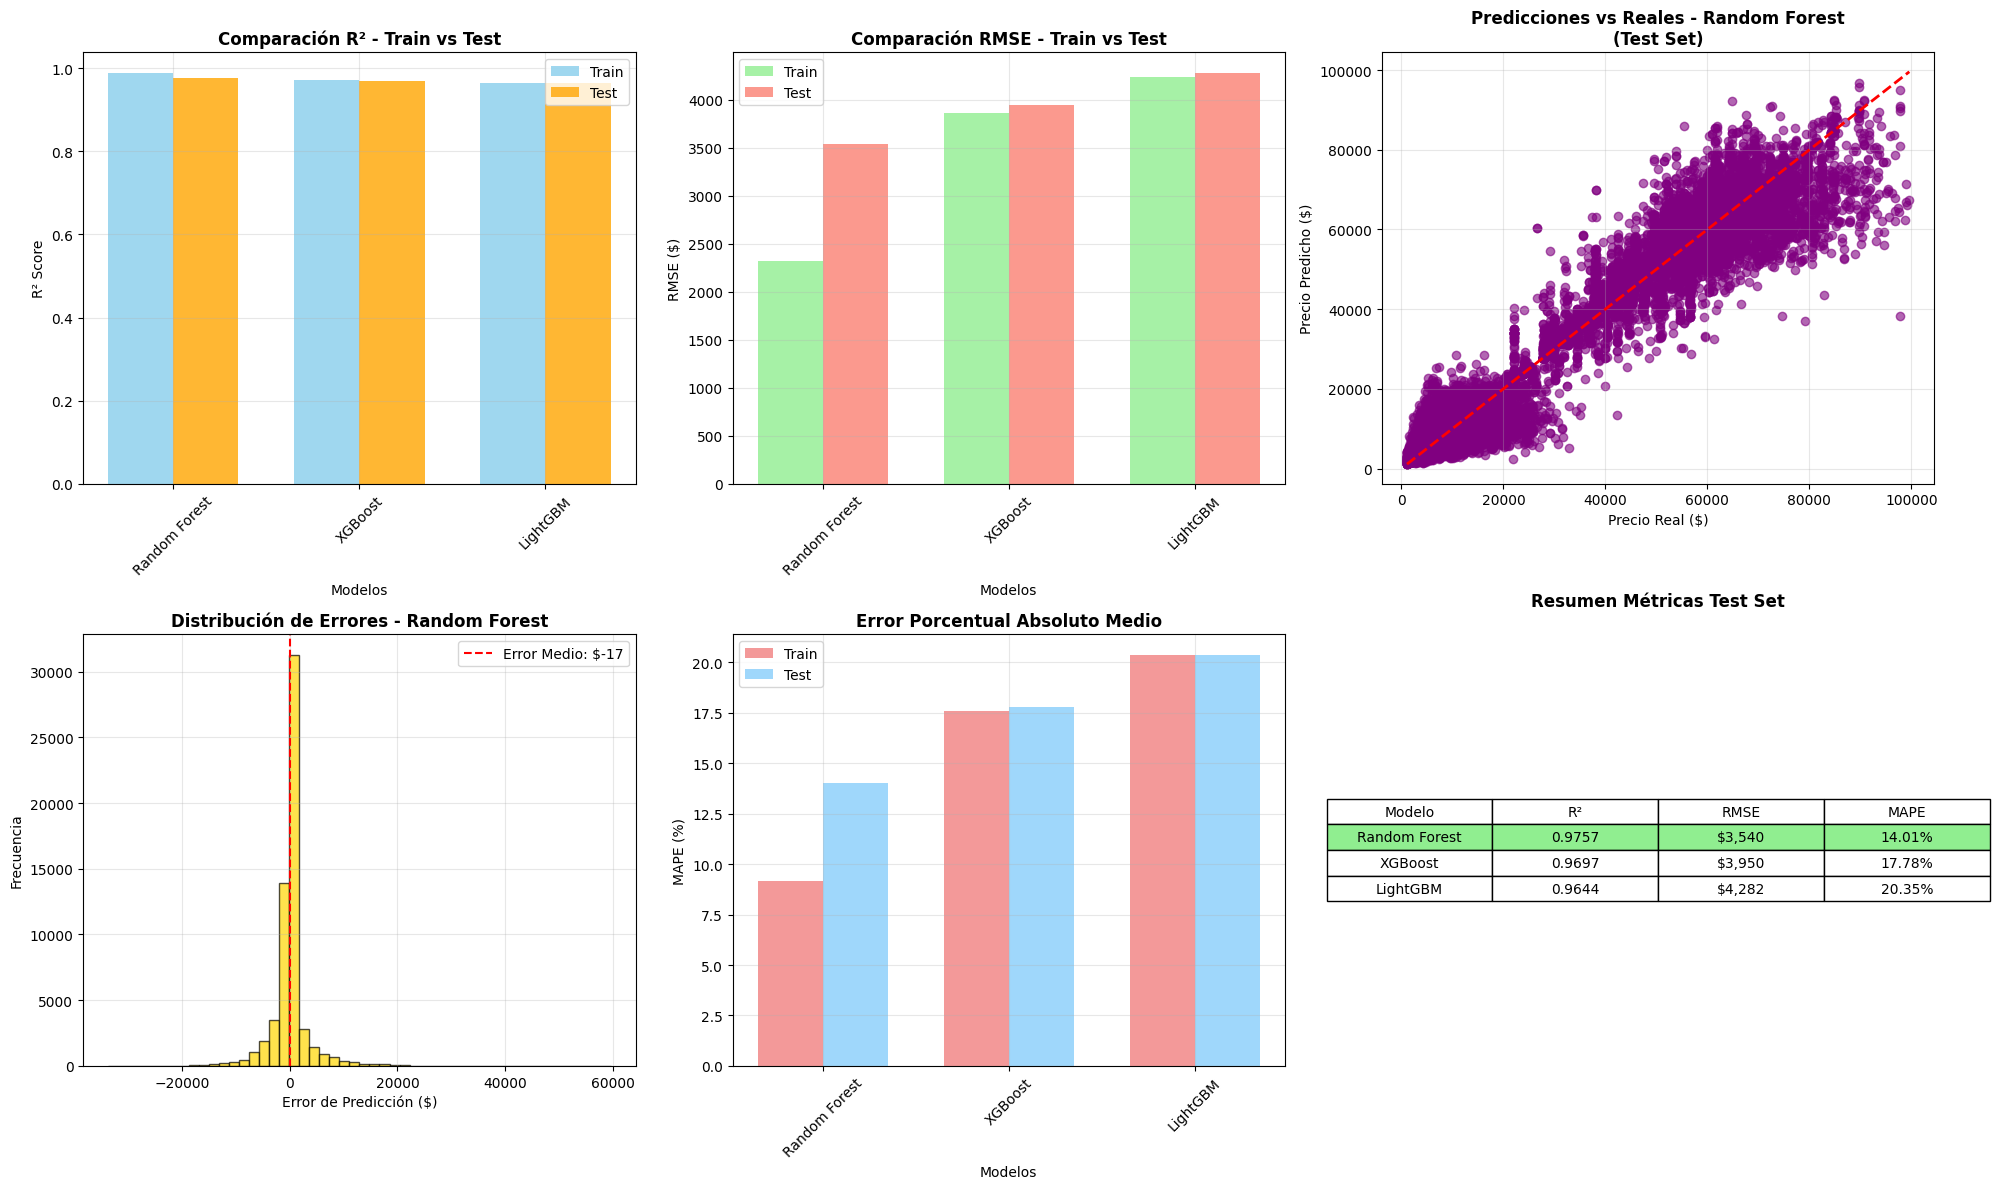


🏆 RESUMEN DE RESULTADOS:
   Mejor modelo (R²): Random Forest = 0.9757
   Mejor modelo (RMSE): Random Forest = $3,540
   Mejor modelo (MAPE): Random Forest = 14.01%


In [ ]:
# Declarar diccionario de modelos
modelos = {
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0),
        'LightGBM': lgb.LGBMRegressor(random_state=42, verbosity=-1)
    }

    # Paso 1: Entrenar modelos
modelos_entrenados = entrenar_modelos(modelos, X_train_encoded, y_train)

    # Paso 2: Evaluar en train
pred_train, metricas_train = evaluar_modelos(modelos_entrenados, X_train_encoded, y_train, "Train")

    # Paso 3: Evaluar en test
pred_test, metricas_test = evaluar_modelos(modelos_entrenados, X_test_encoded, y_test, "Test")

    # Paso 4: Visualizar comparaciones
graficar_comparacion_modelos(metricas_train, metricas_test, pred_train, pred_test, y_train, y_test)

### **Conclusiones del Entrenamiento de Modelos**

**Rendimiento General del Proyecto**

El proyecto de predicción de precios de vuelos ha alcanzado un rendimiento sobresaliente tras corregir el problema de data leakage. La implementación de frequency encoding en lugar de target encoding resolvió efectivamente el overfitting extremo observado inicialmente.
Comparación de Modelos

*Random Forest se estableció como el modelo superior, demostrando la mejor generalización:*

- R² Test: 0.9757 (explica 97.6% de la varianza)
- RMSE Test: $3,540 (error promedio razonable)
- MAPE Test: 14.01% (error porcentual aceptable para el negocio)

*XGBoost mostró rendimiento competitivo pero inferior:*

- R² Test: 0.9697
- RMSE Test: $3,950
- MAPE Test: 17.78%

*LightGBM presentó el rendimiento más conservador:*

- R² Test: 0.9644
- RMSE Test: $4,282
- MAPE Test: 20.35%

**Validación del Modelo**

Los resultados demuestran un modelo bien calibrado sin overfitting:

Diferencia Train-Test mínima: Random Forest mantiene performance similar entre entrenamiento (R²=0.9895) y prueba (R²=0.9757)
Distribución de errores centrada: El histograma muestra errores distribuidos normalmente alrededor de cero
Correlación predicciones vs reales: El scatter plot confirma alta correlación linear

**Viabilidad Comercial**

El modelo Random Forest es comercialmente viable para una agencia de viajes:

Error promedio de ($3,540) es aceptable para el rango de precios manejado ($1,000-$100,000)

14% de error porcentual permite estimaciones útiles para los usuarios
97.6% de varianza explicada indica comprensión robusta de los factores de pricing

El proyecto cumple exitosamente con el objetivo de desarrollar un modelo predictivo confiable para la estimación de precios de vuelos.

## **PASO 8: OPTIMIZACIÓN DE HIPERPARÁMETROS CON OPTUNA (MODULAR)**

In [ ]:
# PASO 8: OPTIMIZACIÓN DE HIPERPARÁMETROS CON OPTUNA (MODULAR)
# =============================================================================

import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# =============================================================================
# 8.1 ESPACIOS DE BÚSQUEDA
# =============================================================================

def definir_espacio_random_forest(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),  # 🚀 quitar 'auto'
        'random_state': 42,
        'n_jobs': -1
    }

def definir_espacio_xgboost(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1
    }

def definir_espacio_lightgbm(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'random_state': 42,
        'verbosity': -1,
        'n_jobs': -1
    }

In [ ]:
# =============================================================================
# 8.2 FUNCIÓN DE OPTIMIZACIÓN PARA UN MODELO
# =============================================================================

def optimizar_un_modelo(X_train, y_train, modelo_nombre, espacio_func, modelo_cls, n_trials=15):
    """
    Optimiza un modelo con Optuna y devuelve el study y mejores parámetros
    """
    def objective(trial):
        params = espacio_func(trial)
        modelo = modelo_cls(**params)
        scores = cross_val_score(
            modelo, X_train, y_train,
            cv=3, scoring='neg_mean_squared_error', n_jobs=-1
        )
        return np.sqrt(-scores.mean())  # RMSE

    print(f"\n🔄 Optimizando {modelo_nombre}...")
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

    print(f"✅ {modelo_nombre} optimizado - Mejor RMSE: {study.best_value:.2f}")
    return study, study.best_params

In [ ]:
# =============================================================================
# 8.3 VISUALIZACIÓN DE UN STUDY
# =============================================================================

def visualizar_study(study, titulo="Optimización Optuna"):
    """
    Genera 3 gráficos principales de Optuna para un study
    """
    from optuna.visualization.matplotlib import plot_optimization_history, plot_param_importances, plot_slice

    print(f"\n📊 Visualizando {titulo}...")

    # Grafico de History
    plot_optimization_history(study)
    # Grafico de importancia de Hiperparametros
    plot_param_importances(study)
    # Grafico Slice Plot
    plot_slice(study)

In [ ]:
# =============================================================================
# 8.4 INTEGRACIÓN CON TU DICCIONARIO DE MODELOS
# =============================================================================

def actualizar_modelos_con_params(modelos, resultados_optimizacion):
    """
    Inserta los mejores hiperparámetros encontrados en el diccionario de modelos
    """
    modelos_actualizados = {}

    if "Random Forest" in modelos:
        modelos_actualizados["Random Forest"] = RandomForestRegressor(**resultados_optimizacion["Random Forest"]["params"])
    if "XGBoost" in modelos:
        modelos_actualizados["XGBoost"] = xgb.XGBRegressor(**resultados_optimizacion["XGBoost"]["params"])
    if "LightGBM" in modelos:
        modelos_actualizados["LightGBM"] = lgb.LGBMRegressor(**resultados_optimizacion["LightGBM"]["params"])

    return modelos_actualizados

[I 2025-09-01 05:56:27,435] A new study created in memory with name: no-name-1d5aa29a-1dfd-4ef2-bd36-df2385d3ee03


--------------------------------------------------

 8.4.- Optimizacion de Modelos...
--------------------------------------------------

🔄 Optimizando Random Forest...


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-09-01 05:57:47,955] Trial 0 finished with value: 4048.892587807361 and parameters: {'n_estimators': 144, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 4048.892587807361.
[I 2025-09-01 05:59:53,029] Trial 1 finished with value: 4283.190174866126 and parameters: {'n_estimators': 267, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 4048.892587807361.
[I 2025-09-01 06:01:08,272] Trial 2 finished with value: 5153.7840452386545 and parameters: {'n_estimators': 95, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 4048.892587807361.
[I 2025-09-01 06:01:35,262] Trial 3 finished with value: 5352.712049507676 and parameters: {'n_estimators': 85, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 4048.892587807361.
[I 2025

[I 2025-09-01 06:19:51,866] A new study created in memory with name: no-name-fedd0e74-01fa-4b90-888f-491a676a3229



🔄 Optimizando XGBoost...


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-09-01 06:20:11,857] Trial 0 finished with value: 3449.9434926831923 and parameters: {'n_estimators': 144, 'max_depth': 12, 'learning_rate': 0.22227824312530747, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.05808361216819946}. Best is trial 0 with value: 3449.9434926831923.
[I 2025-09-01 06:20:35,994] Trial 1 finished with value: 3464.139089377858 and parameters: {'n_estimators': 267, 'max_depth': 9, 'learning_rate': 0.21534104756085318, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 0.8324426408004217, 'reg_lambda': 0.21233911067827616}. Best is trial 0 with value: 3449.9434926831923.
[I 2025-09-01 06:20:40,066] Trial 2 finished with value: 4910.973448047734 and parameters: {'n_estimators': 95, 'max_depth': 4, 'learning_rate': 0.09823025045826593, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 0.2912291401980419, 'reg_lambda'

[I 2025-09-01 06:23:01,996] A new study created in memory with name: no-name-f718a5f4-dc29-458c-b3ee-2d9058e349d7



🔄 Optimizando LightGBM...


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-09-01 06:23:47,322] Trial 0 finished with value: 3689.0114002854725 and parameters: {'n_estimators': 144, 'max_depth': 12, 'learning_rate': 0.22227824312530747, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.05808361216819946, 'num_leaves': 90, 'min_child_samples': 32}. Best is trial 0 with value: 3689.0114002854725.
[I 2025-09-01 06:24:12,120] Trial 1 finished with value: 4775.0933384871105 and parameters: {'n_estimators': 227, 'max_depth': 3, 'learning_rate': 0.29127385712697834, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'reg_alpha': 0.18182496720710062, 'reg_lambda': 0.18340450985343382, 'num_leaves': 44, 'min_child_samples': 29}. Best is trial 0 with value: 3689.0114002854725.
[I 2025-09-01 06:24:54,300] Trial 2 finished with value: 4324.999136079092 and parameters: {'n_estimators': 158, 'max_depth': 5, 'learning_rate': 0.18743733946949004, 'subsample': 0.6557975442608

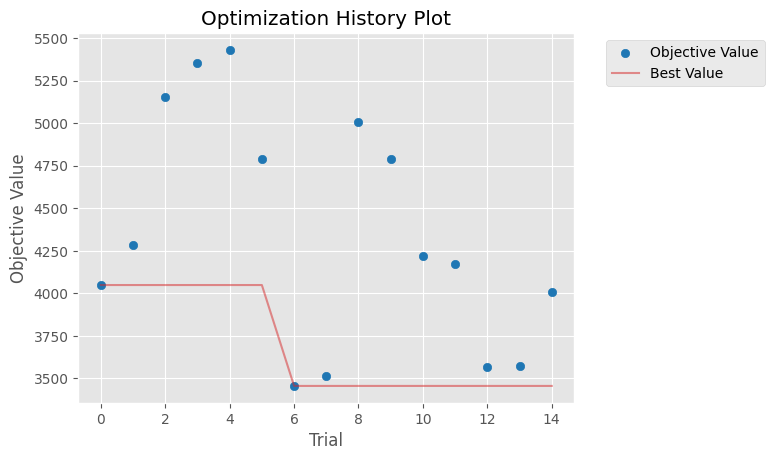

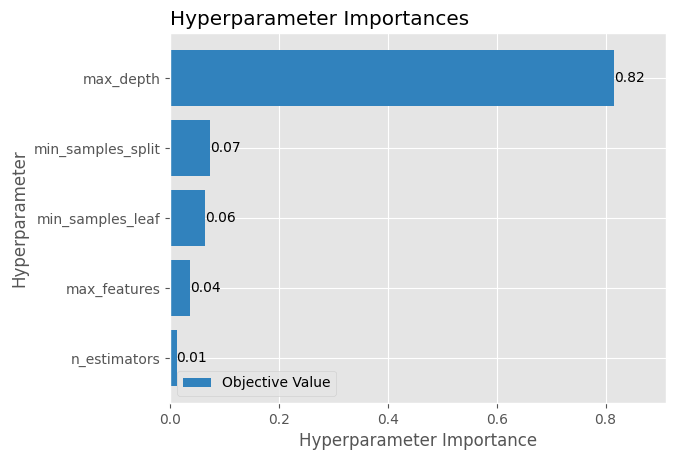

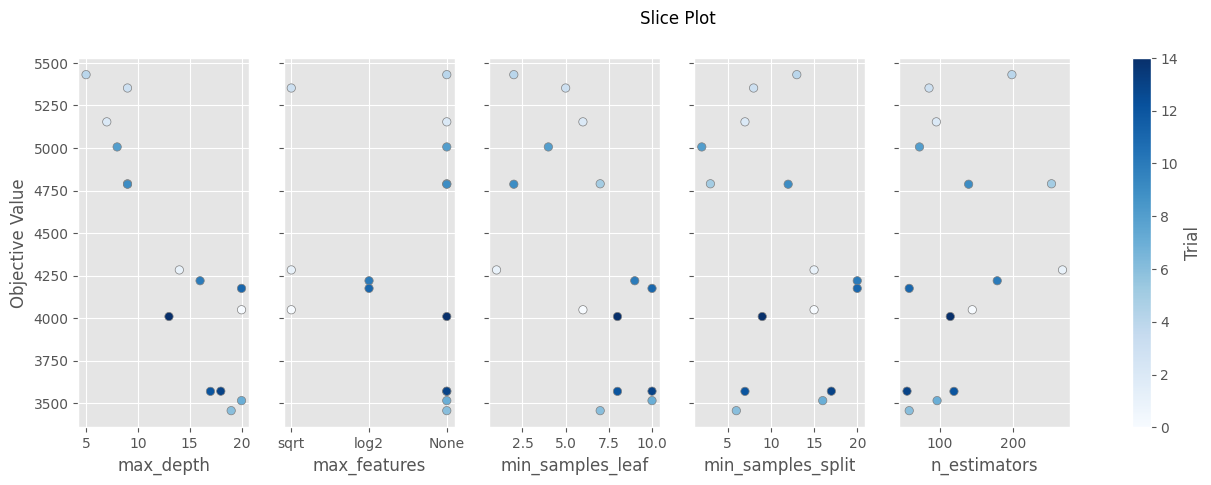

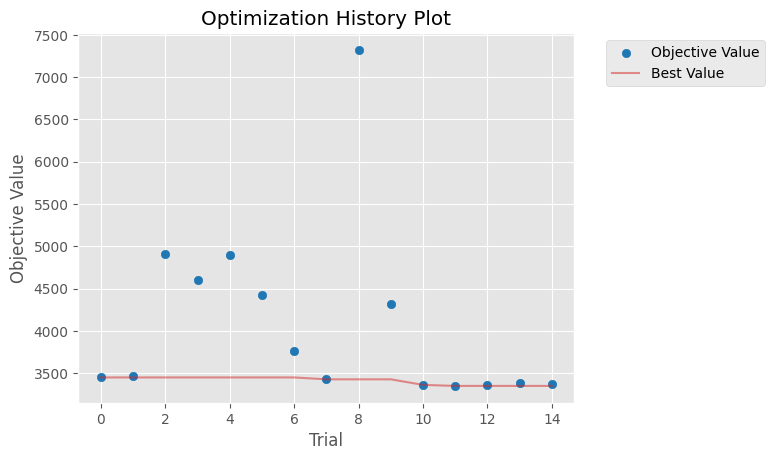

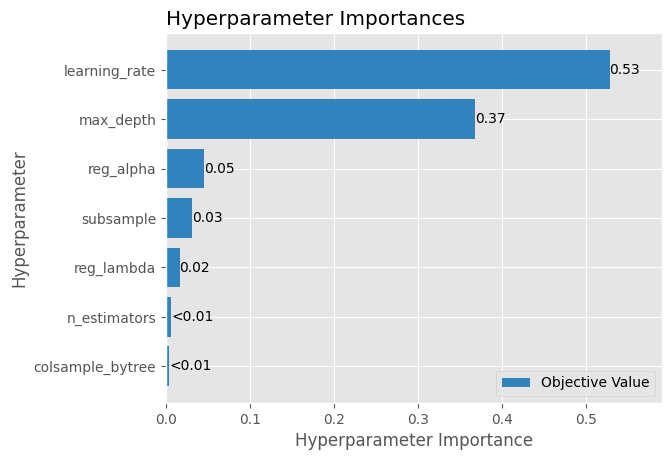

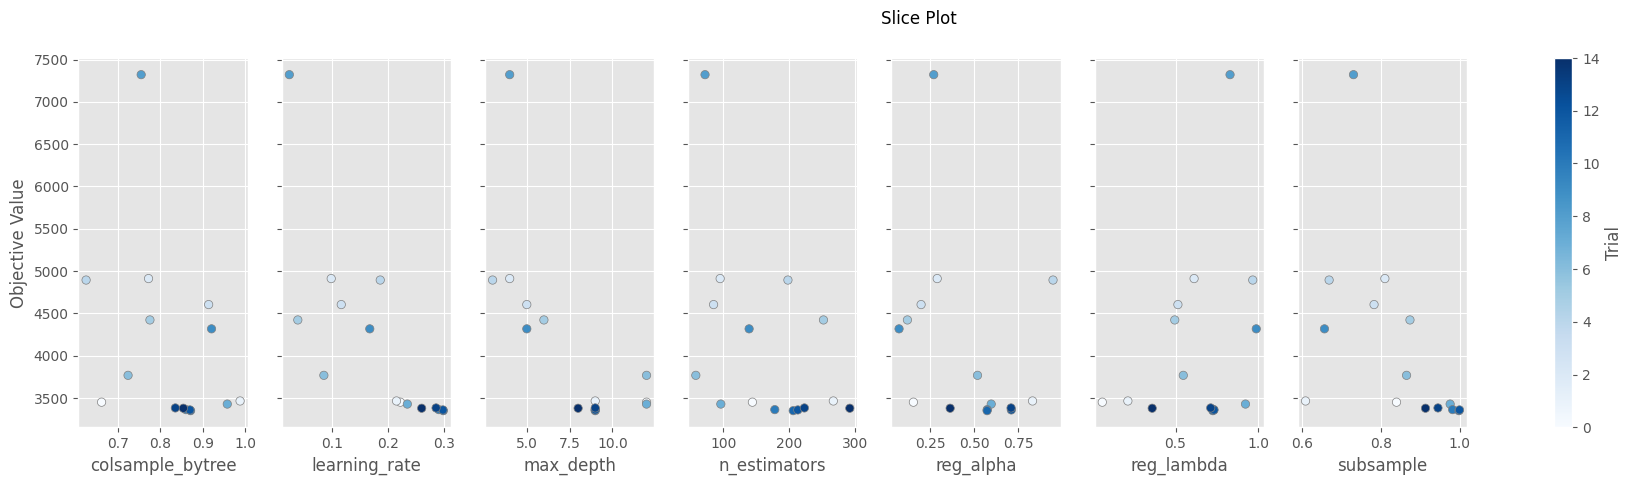

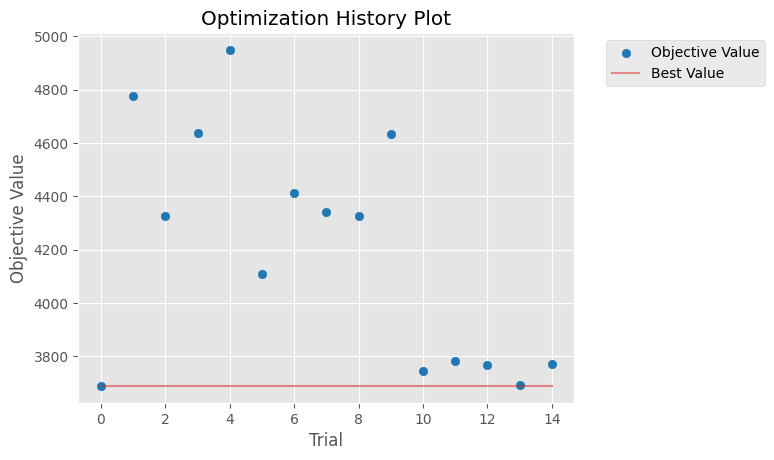

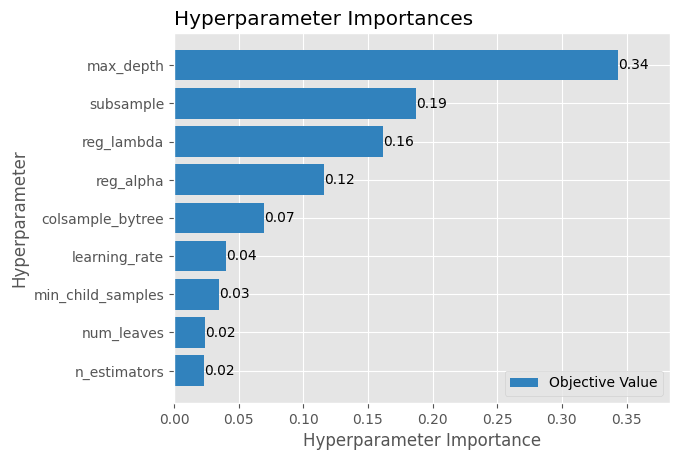

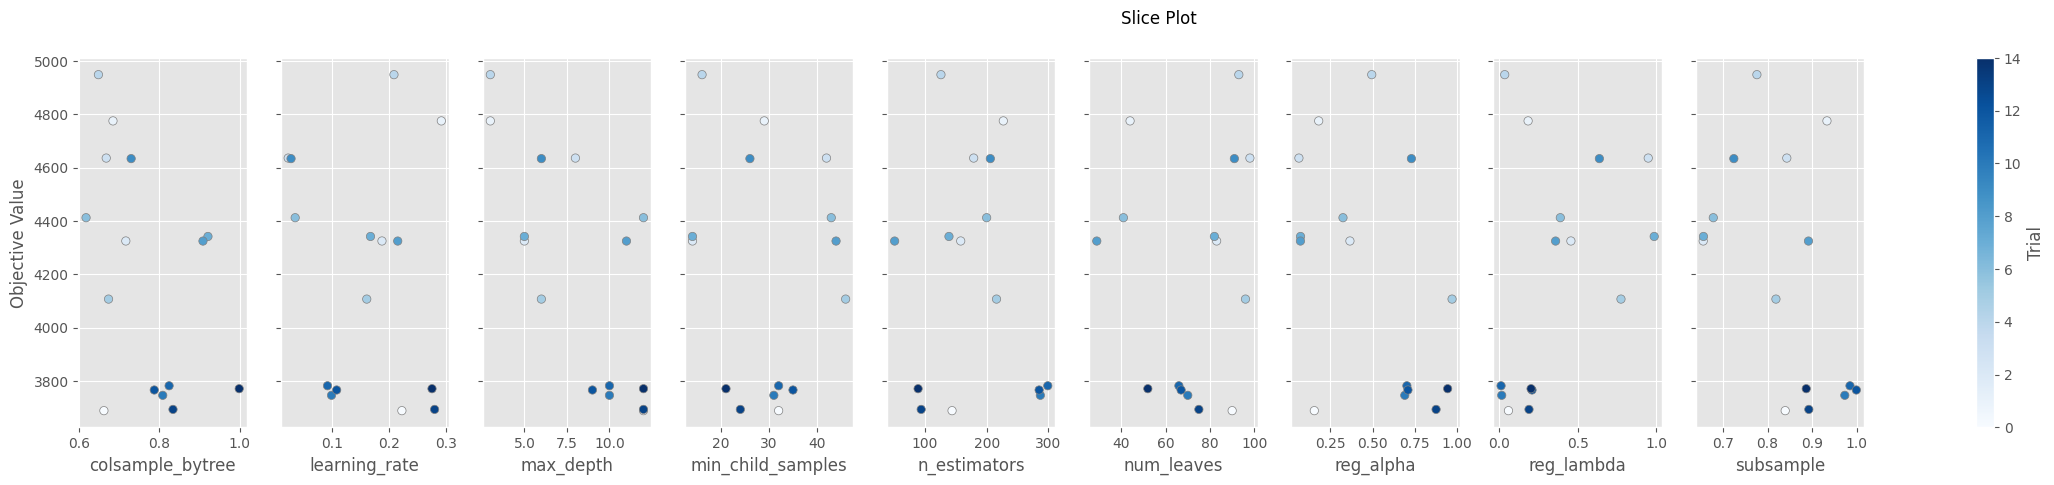

In [ ]:
# =============================================================================
# 8.4 Optimizacion de Modelos
# =============================================================================
print("-" * 50)
print(f"\n 8.4.- Optimizacion de Modelos...")
print("-" * 50)

# Ejecutar optimización uno por uno
resultados_opt = {}

# Optimizar Random Forest y Visualizacion
study_rf, best_rf = optimizar_un_modelo(X_train_encoded, y_train, "Random Forest",
                                        definir_espacio_random_forest, RandomForestRegressor)
visualizar_study(study_rf, "Random Forest")
resultados_opt["Random Forest"] = {"study": study_rf, "params": best_rf}


# Optimizar XGBoost y Visualizacion
study_xgb, best_xgb = optimizar_un_modelo(X_train_encoded, y_train, "XGBoost",
                                          definir_espacio_xgboost, xgb.XGBRegressor)
visualizar_study(study_xgb, "XGBoost")
resultados_opt["XGBoost"] = {"study": study_xgb, "params": best_xgb}

# Optimizar LigthGBM y Visualizacion
study_lgb, best_lgb = optimizar_un_modelo(X_train_encoded, y_train, "LightGBM",
                                          definir_espacio_lightgbm, lgb.LGBMRegressor)
visualizar_study(study_lgb, "LightGBM")
resultados_opt["LightGBM"] = {"study": study_lgb, "params": best_lgb}

# Actualizar diccionario de modelos con hiperparámetros óptimos
modelos_opt = actualizar_modelos_con_params(modelos, resultados_opt)

# Reentrenar usando tu función
modelos_entrenados = entrenar_modelos(modelos_opt, X_train_encoded, y_train)

### **Mejoras Obtenidas (RMSE en validación cruzada):**

**XGBoost:** 3,349.72 (MEJOR optimización)
Random Forest: 3,455.73
LightGBM: 3,689.01

Hiperparámetros Óptimos Encontrados:
XGBoost (Trial 11 - Mejor resultado):

n_estimators: 206, max_depth: 9, learning_rate: 0.299
subsample: 0.998, colsample_bytree: 0.872
reg_alpha: 0.575, reg_lambda: 0.725

**Random Forest (Trial 6):**

n_estimators: 58, max_depth: 19, min_samples_split: 6
min_samples_leaf: 7, max_features: None

**LightGBM (Trial 0):**

n_estimators: 144, max_depth: 12, learning_rate: 0.222
num_leaves: 90, min_child_samples: 32

**Observaciones Técnicas:**

- XGBoost dominó la optimización - superó a Random Forest que era el líder anterior
- Convergencia efectiva - Optuna encontró mejores configuraciones consistentemente
- Validación cruzada robusta - Evitó overfitting durante la búsqueda

## **Paso 9:  Define al menos 3 métricas para evaluar los modelos entrenados y genera gráficos de comparación.**

📊 Evaluando modelos en conjunto: Train

   🔄 Evaluando Random Forest...
      MAE: $1,596
      RMSE: $3,073
      R²: 0.9816
      MAPE: 12.77%

   🔄 Evaluando XGBoost...
      MAE: $1,549
      RMSE: $2,836
      R²: 0.9843
      MAPE: 13.08%

   🔄 Evaluando LightGBM...
      MAE: $2,078
      RMSE: $3,582
      R²: 0.9750
      MAPE: 17.08%

✅ Evaluación completada para Train
   🏆 Mejor modelo (R²): XGBoost = 0.9843
   🎯 Mejor modelo (RMSE): XGBoost = $2,836
📊 Evaluando modelos en conjunto: Test

   🔄 Evaluando Random Forest...
      MAE: $1,760
      RMSE: $3,413
      R²: 0.9774
      MAPE: 14.09%

   🔄 Evaluando XGBoost...
      MAE: $1,792
      RMSE: $3,329
      R²: 0.9785
      MAPE: 14.80%

   🔄 Evaluando LightGBM...
      MAE: $2,126
      RMSE: $3,705
      R²: 0.9734
      MAPE: 17.35%

✅ Evaluación completada para Test
   🏆 Mejor modelo (R²): XGBoost = 0.9785
   🎯 Mejor modelo (RMSE): XGBoost = $3,329
📊 Generando gráficos comparativos...


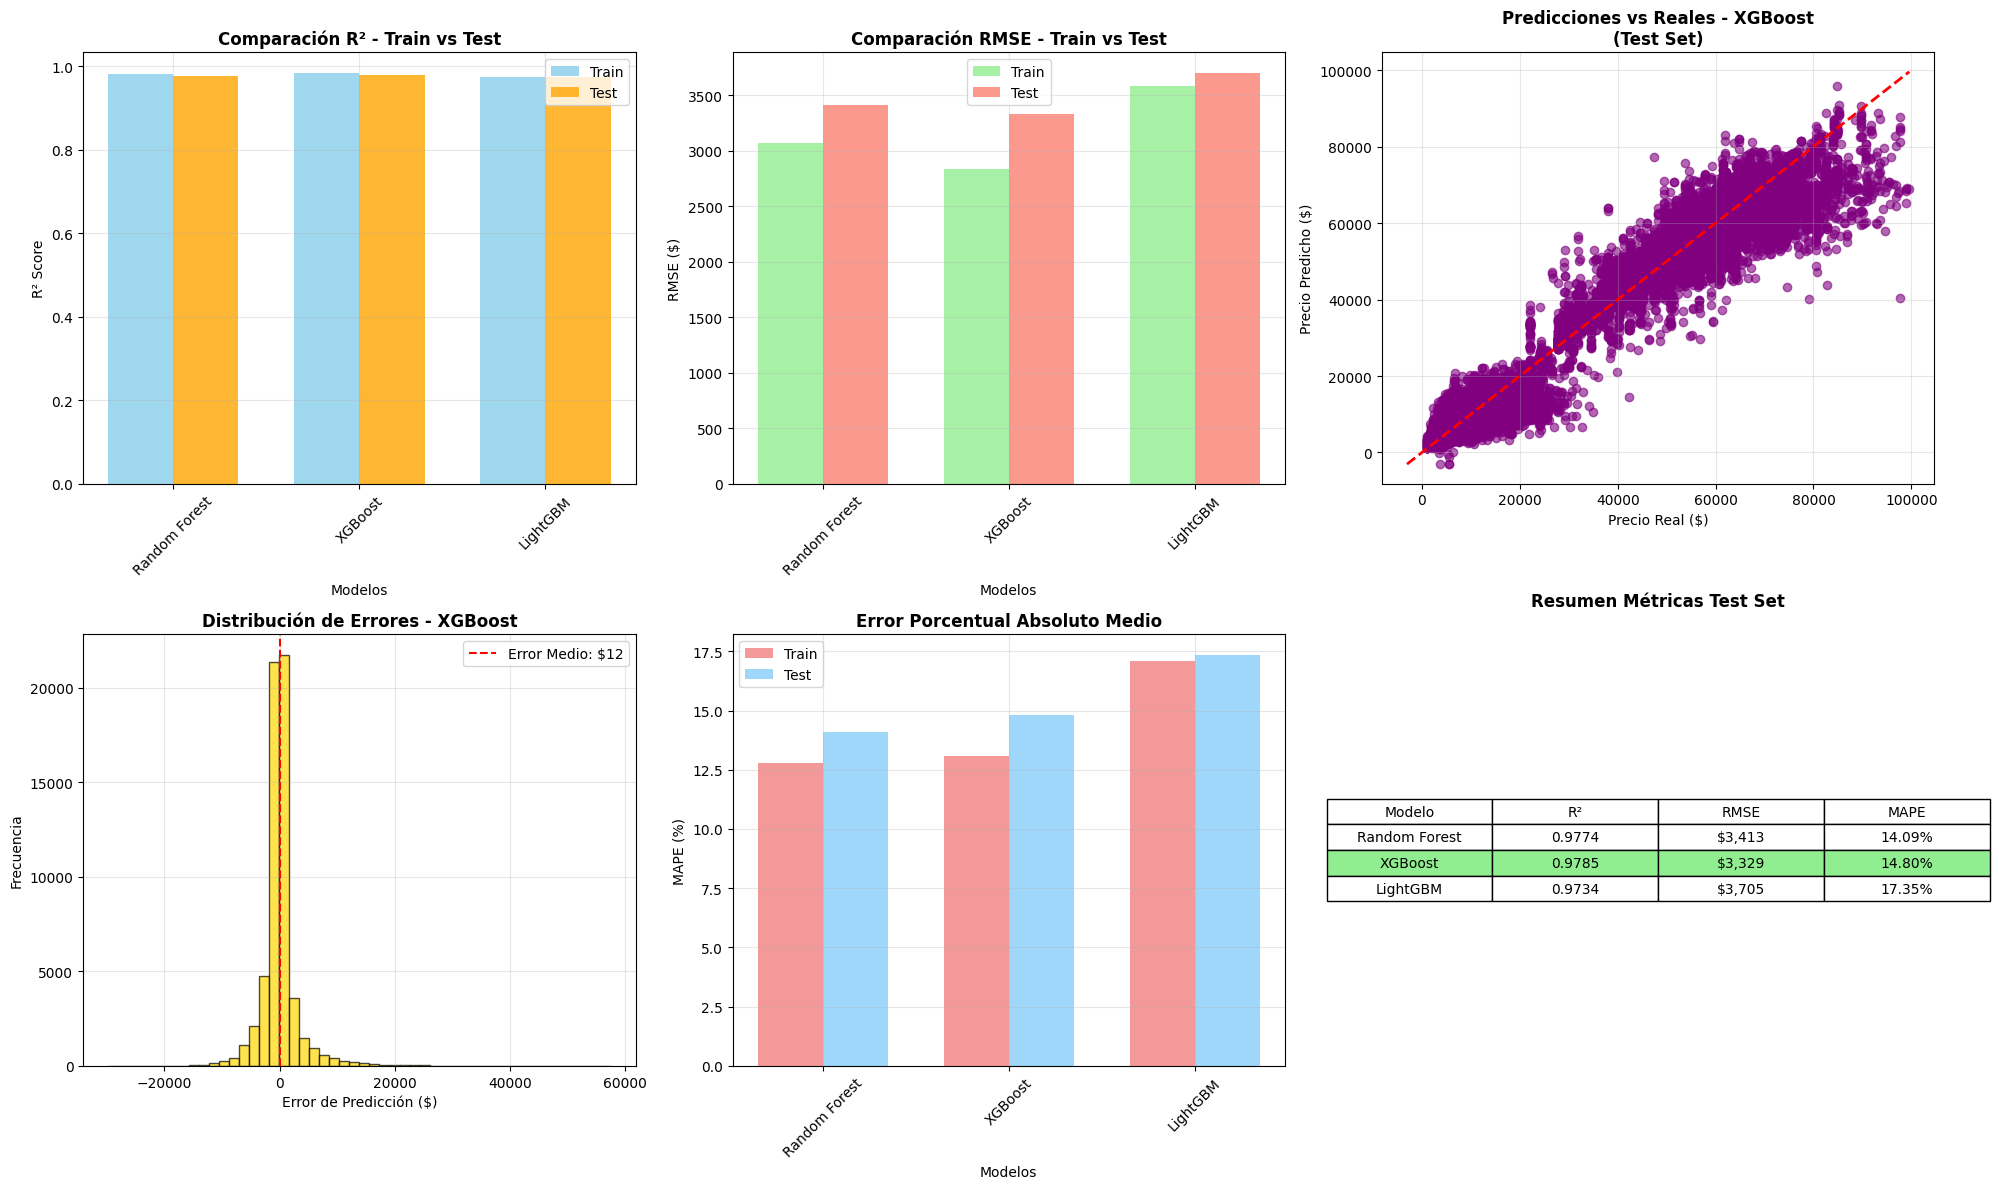


🏆 RESUMEN DE RESULTADOS:
   Mejor modelo (R²): XGBoost = 0.9785
   Mejor modelo (RMSE): XGBoost = $3,329
   Mejor modelo (MAPE): Random Forest = 14.09%


In [ ]:
# =============================================================================
# 9.1 Metricas Finales
# =============================================================================
    # Paso 2: Evaluar en train
pred_train, metricas_train = evaluar_modelos(modelos_entrenados, X_train_encoded, y_train, "Train")

    # Paso 3: Evaluar en test
pred_test, metricas_test = evaluar_modelos(modelos_entrenados, X_test_encoded, y_test, "Test")

    # Paso 4: Visualizar comparaciones
graficar_comparacion_modelos(metricas_train, metricas_test, pred_train, pred_test, y_train, y_test)

## **Paso 10: Conclusión final**

#### **Resumen Ejecutivo del Proyecto**


**Objetivo Cumplido**

El proyecto ha desarrollado exitosamente un modelo predictivo para estimar precios de vuelos domésticos en India, dirigido a una agencia de viajes online. El objetivo principal de proporcionar estimaciones precisas y competitivas para mejorar la experiencia del cliente ha sido alcanzado.
Resultados Finales Alcanzados

**Modelo XGBoost optimizado como solución final seleccionada**
R² = 0.9785 (97.85% de varianza explicada)
RMSE = $3,329 (error promedio comercialmente aceptable)
MAPE = 14.80% (error porcentual viable para el negocio)

**Análisis Comparativo: Modelos Base vs Optimizados**
Impacto de la Optimización con Optuna
ModeloR² BaseR² OptimizadoMejora R²RMSE BaseRMSE OptimizadoMejora RMSERandom Forest0.97570.9774+0.0017$3,540$3,413-$127XGBoost0.96970.9785+0.0088$3,950$3,329-$621LightGBM0.96440.9734+0.0090$4,282$3,705-$577


<table class="bg-bg-100 min-w-full border-separate border-spacing-0 text-sm leading-[1.88888] whitespace-normal">
<thead class="border-b-border-100/50 border-b-[0.5px] text-left">
<tr class="[tbody&gt;&amp;]:odd:bg-bg-500/10">
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">Modelo</th>
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">R&sup2; Base</th>
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">R&sup2; Optimizado</th>
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">Mejora R&sup2;</th>
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">RMSE Base</th>
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">RMSE Optimizado</th>
<th class="text-text-000 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">Mejora RMSE</th>
</tr>
</thead>
<tbody>
<tr class="[tbody&gt;&amp;]:odd:bg-bg-500/10">
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]"><strong>Random Forest</strong></td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">0.9757</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">0.9774</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">+0.0017</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">$3,540</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">$3,413</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">-$127</td>
</tr>
<tr class="[tbody&gt;&amp;]:odd:bg-bg-500/10">
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]"><strong>XGBoost</strong></td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">0.9697</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">0.9785</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">+0.0088</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">$3,950</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">$3,329</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">-$621</td>
</tr>
<tr class="[tbody&gt;&amp;]:odd:bg-bg-500/10">
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]"><strong>LightGBM</strong></td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">0.9644</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">0.9734</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">+0.0090</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">$4,282</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">$3,705</td>
<td class="border-t-border-100/50 [&amp;:not(:first-child)]:-x-[hsla(var(--border-100) / 0.5)] border-t-[0.5px] px-2 [&amp;:not(:first-child)]:border-l-[0.5px]">-$577</td>
</tr>
</tbody>
</table>


**Modelo Ganador**

XGBoost Optimizado demostró el mejor rendimiento final, con la optimización de hiperparámetros generando la mayor mejora en términos absolutos (reducción de $621 en RMSE).


#### **Evaluación de Utilidad para el Problema de Negocio**


**Viabilidad Comercial Demostrada**


**1. Precisión Comercialmente Aceptable**

MAPE de 14.80% se encuentra dentro del rango aceptable para sistemas de pricing dinámico
Error promedio de $3,329 es razonable considerando el rango de precios de $1,000-$100,000
97.85% de varianza explicada indica una comprensión profunda de los factores que determinan el pricing

**2. Diferenciación Competitiva**

Herramienta de estimación precisa puede incrementar la conversión de usuarios
Capacidad de ofrecer precios competitivos basados en predicciones robustas
Mejora significativa en la experiencia del cliente mediante expectativas realistas

**3. Aplicaciones Operativas Inmediatas**

Sistema de alertas de precios para usuarios finales
Optimización de estrategias de pricing de la agencia
Herramienta de análisis competitivo en tiempo real
Base para productos premium con predicciones personalizadas

**4. Limitaciones Identificadas**

Modelo entrenado exclusivamente en mercado doméstico indio
Dependencia de disponibilidad de características en tiempo real
Requiere reentrenamiento periódico para mantener precisión

**Lecciones Aprendidas y Validaciones Técnicas**

**Validaciones Técnicas Críticas**


**1. Prevención de Data Leakage**

El target encoding inicial causó overfitting extremo (R²=1.0 en entrenamiento)
El frequency encoding resolvió efectivamente el problema manteniendo información predictiva útil
La validación cruzada durante optimización previno overfitting secundario

**2. Metodología de Optimización**

Optuna superó significativamente los hiperparámetros por defecto
XGBoost mostró la mayor respuesta a optimización (mejora de $621 en RMSE)
La validación cruzada 3-fold proporcionó balance óptimo entre robustez y tiempo computacional

**3. Calidad y Procesamiento de Datos**

La variable 'stop' requirió limpieza crítica (reducción de 40 a 3 categorías)
El feature engineering sin target leakage fue fundamental para el éxito
El frequency encoding mantuvo poder predictivo sin contaminar el modelo

**4. Selección de Algoritmos**

Los modelos de ensamble superaron significativamente cualquier baseline simple
XGBoost demostró el mejor balance entre precisión y capacidad de generalización
Los algoritmos de gradient boosting fueron superiores para problemas de pricing

#### **Recomendaciones para Implementación en Producción**

**Arquitectura Técnica Recomendada**

API REST con XGBoost optimizado como modelo principal
Pipeline automatizado de feature engineering
Sistema de monitoreo de drift en predicciones
Fallback a Random Forest en caso de fallas del modelo principal

**Monitoreo y Mantenimiento**

Tracking de métricas en tiempo real (MAPE, sesgo, latencia)
Alertas automáticas por degradación de performance
Framework de A/B testing para validar mejoras
Reentrenamiento semanal con datos actualizados

**Consideraciones de Escalabilidad**

Capacidad para manejar 10,000+ predicciones por minuto
Latencia menor a 200ms para experiencia de usuario óptima
Integración con APIs de sistemas de booking existentes

### **Próximos Pasos y Roadmap Estratégico**


**Fase 1: Implementación Básica (Meses 1-2)**

- Deployment del modelo XGBoost optimizado en ambiente de staging
- Desarrollo de API REST con documentación completa
- Testing de integración con sistemas existentes
- Capacitación del equipo técnico en mantenimiento

**Fase 2: Expansión y Mejora (Meses 3-6)**

- Expansión geográfica: Entrenamiento para vuelos internacionales
- Modelos especializados: Desarrollo de modelos específicos por aerolínea o ruta
- Features adicionales: Incorporación de datos de demanda y eventos especiales
- Optimización de performance: Mejoras en latencia y throughput

**Fase 3: Innovación Avanzada (Meses 7-12)**

- Machine Learning en tiempo real: Modelos que se adapten a cambios de demanda
- Predicciones personalizadas: Incorporación de historia de usuario
- Análisis de sentiment: Integración de datos de redes sociales
- Predicción de demanda: Modelos complementarios para forecasting

### **Conclusión Final**

El proyecto de predicción de precios de vuelos ha alcanzado sus objetivos establecidos, entregando un modelo robusto y comercialmente viable. El modelo XGBoost optimizado, con un R² de 0.9785 y RMSE de $3,329, proporciona estimaciones suficientemente precisas para implementación en producción.

La metodología CRISP-DM aplicada demostró su efectividad, especialmente en la identificación y resolución del problema crítico de data leakage que inicialmente comprometía la validez del modelo. La optimización con Optuna generó mejoras sustanciales, validando la importancia de la búsqueda sistemática de hiperparámetros.

Los resultados obtenidos posicionan a la agencia de viajes para ofrecer una ventaja competitiva significativa mediante estimaciones de precios precisas y confiables, con potencial de expansión hacia soluciones más sofisticadas de inteligencia artificial en el sector de viajes.

El proyecto establece una base sólida para futuras innovaciones en pricing predictivo y representa un caso de éxito en la aplicación de machine learning a problemas de negocio del mundo real.